In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

本模块的函数族旨在针对单点的预报提供不同时间起报的预报同实况的快速对比，这样可以快速定位最近一段时间内预报的表现，也可用于分析为了一段时间内预报的稳定性情况，不同模式的差异。

### 测试数据集：  
 **数据范围** ： 54511站  
 **观测数据** ： 2m温度、2m露点温度、总云量、能见度、10米风，2020年4月6日08时至12日20时  
 **预报数据** ： ecmwf和grapes的的逐12小时更新的预报。前72小时为逐3小时更新，之后为逐6小时更新

In [2]:
ob_t2m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ob_t2m.h5","df")  #读取观测温度
ec_t2m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ec_t2m.h5","df")  #读取ec预报的温度
grapes_t2m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\grapes_t2m.h5","df") #读取grapes的温度预报
t2m_all = meb.combine_on_obTime_id(ob_t2m,[ec_t2m,grapes_t2m])  #合并观测和预报
print(t2m_all) #合并预报观测数据的参数need_match_ob为缺省值False，因此ob列中的有999999的行未删除

     level                time  dtime     id     lon   lat        ob  \
0      0.0 2020-04-06 08:00:00      3  54511  116.47  39.8      17.6   
1      0.0 2020-04-06 20:00:00      3  54511  116.47  39.8      14.3   
2      0.0 2020-04-07 08:00:00      3  54511  116.47  39.8      15.3   
3      0.0 2020-04-07 20:00:00      3  54511  116.47  39.8      10.1   
4      0.0 2020-04-08 08:00:00      3  54511  116.47  39.8      12.9   
..     ...                 ...    ...    ...     ...   ...       ...   
499    0.0 2020-04-12 20:00:00    120  54511  116.47  39.8  999999.0   
500    0.0 2020-04-12 20:00:00    126  54511  116.47  39.8  999999.0   
501    0.0 2020-04-12 20:00:00    132  54511  116.47  39.8  999999.0   
502    0.0 2020-04-12 20:00:00    138  54511  116.47  39.8  999999.0   
503    0.0 2020-04-12 20:00:00    144  54511  116.47  39.8  999999.0   

         ecmwf     grapes  
0    18.221457  16.606279  
1    14.048767   8.633360  
2    15.223828  15.212000  
3     7.849127   3.2418

# 多模式多时效对比图（线条） 
**time_list_line(sta_ob_and_fos0,s = None,save_dir = None,save_path = None,show = False,dpi = 200,title = "观测和不同起报时间预报对比图"):**  
将不同时刻起报的预报和实况在同一张图中进行显示对比，便于及时发现问题，以曲线的方式叠加显示。

# 多模式多时效误差图（线条） 
**time_list_line_error(sta_ob_and_fos0,s = None,save_dir = None,show = False,dpi = 200,title = "不同起报时间预报误差图")**
将不同时刻起报的预报和实况之间的误差在同一张图中进行显示对比，便于更直观的展示误差大小，以曲线的方式叠加显示。


|参数|说明（上述两个函数参数意义和用法完全相同）|  
|:--|:--|  
|**sta_ob_and_fos**|实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的t2m_all|             
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**save_dir**| 图片输出文件夹，文件的路径将据此自动生成|  
|**save_path**| 图片输出文件路径（仅适合只输出一张图片结果的情况）|  
|**show**| 是否在屏幕显示图片，如果save_path 和save_dir 为都None时，程序内部会自动将show设置True|  
|**dpi**| 绘图所采用dpi参数,效果同matplotlib中dpi参数|  
|**title**|指定图片标题|  
|<font face="黑体" color=blue size=3>return</font>|无返回值|  
  
**调用示例：**


54511
图片已保存至H:/a.png


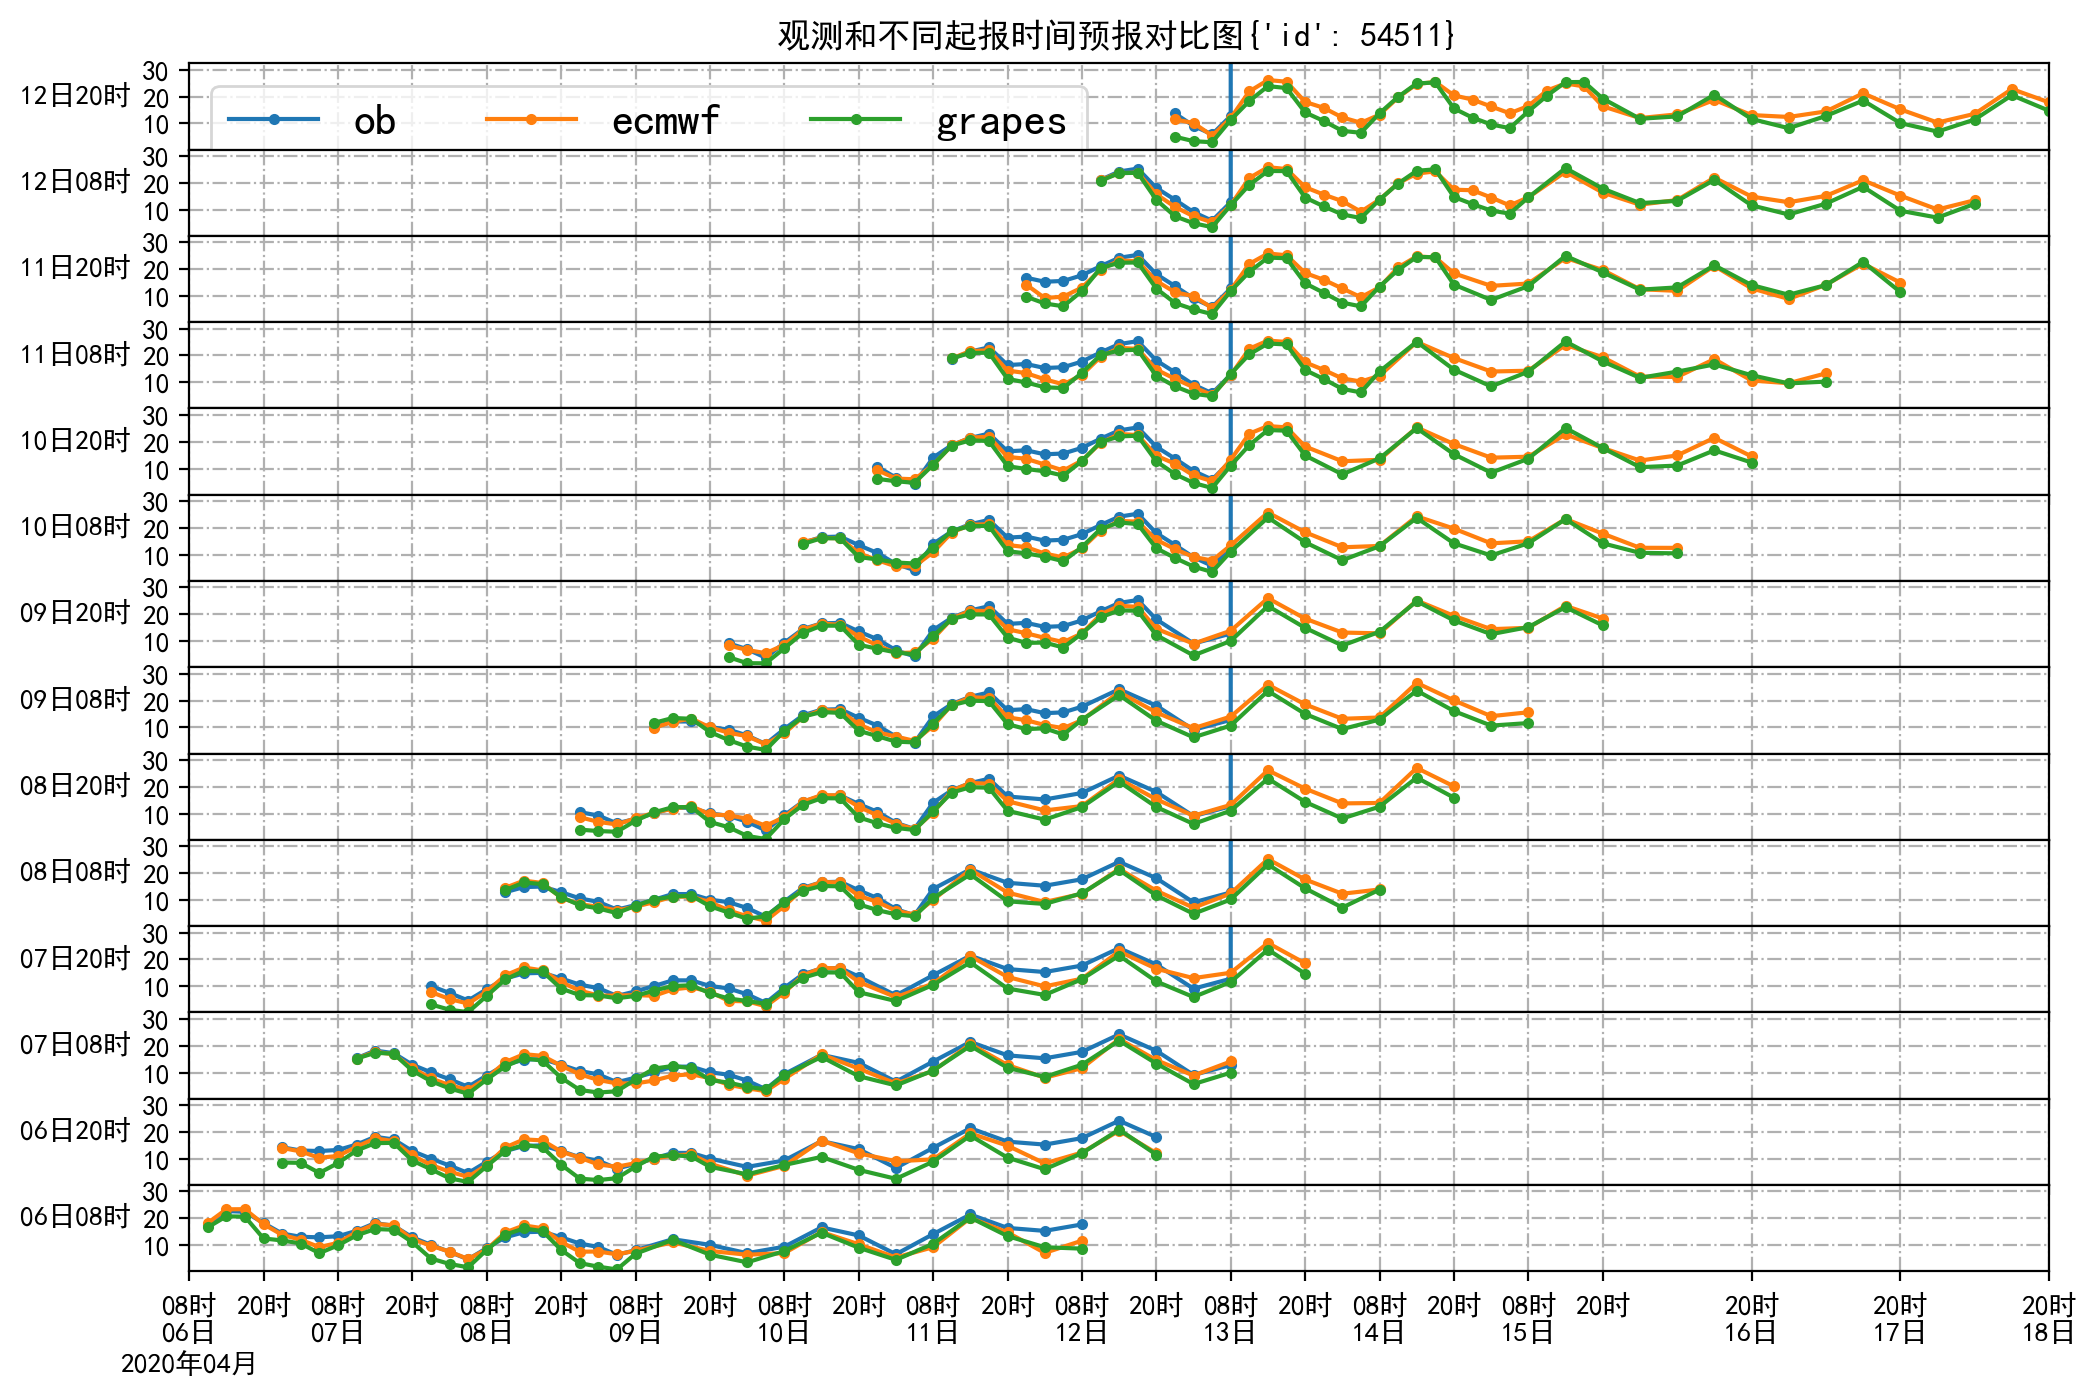

In [3]:
#通过最近，可以通过参数s来提取指定站点，绘制单点的检验图，如果不提取指定站点时，默认对数据中每个站点单独画一张图。
mpd.time_list_line(t2m_all,save_path = "H:/a.png",show = True)

**图形样式说明：**   
1、图中横坐标为观测的时间   
2、纵向包含多个子图，每个子图代表一个起报时刻的结果，起报时间位于坐标轴左侧，子图纵坐标为要素值的大小  
3、在观测数据还不存在的区域，观测的曲线为空，有观测和无观测图像之间以一条竖线分割。 在无观测的部分可以对比不同预报的差异  
4、图片标题中会自动标记站号，如果数据中存在多个站点，则每个站分别输出一张图  


**示例结果解读：**通过上述图片，我们可以非常轻易的发现对于11日的夜间，ecmwf和grapes模式都明显比实况低，而且不同时刻起报的预报都呈现这样的特征，这就提示我们此处可能存在一个和特定时间有关联（背后可能是因为和特定天气系统有关联）的系统误差。提示我们此处的误差需要进一步的分析。

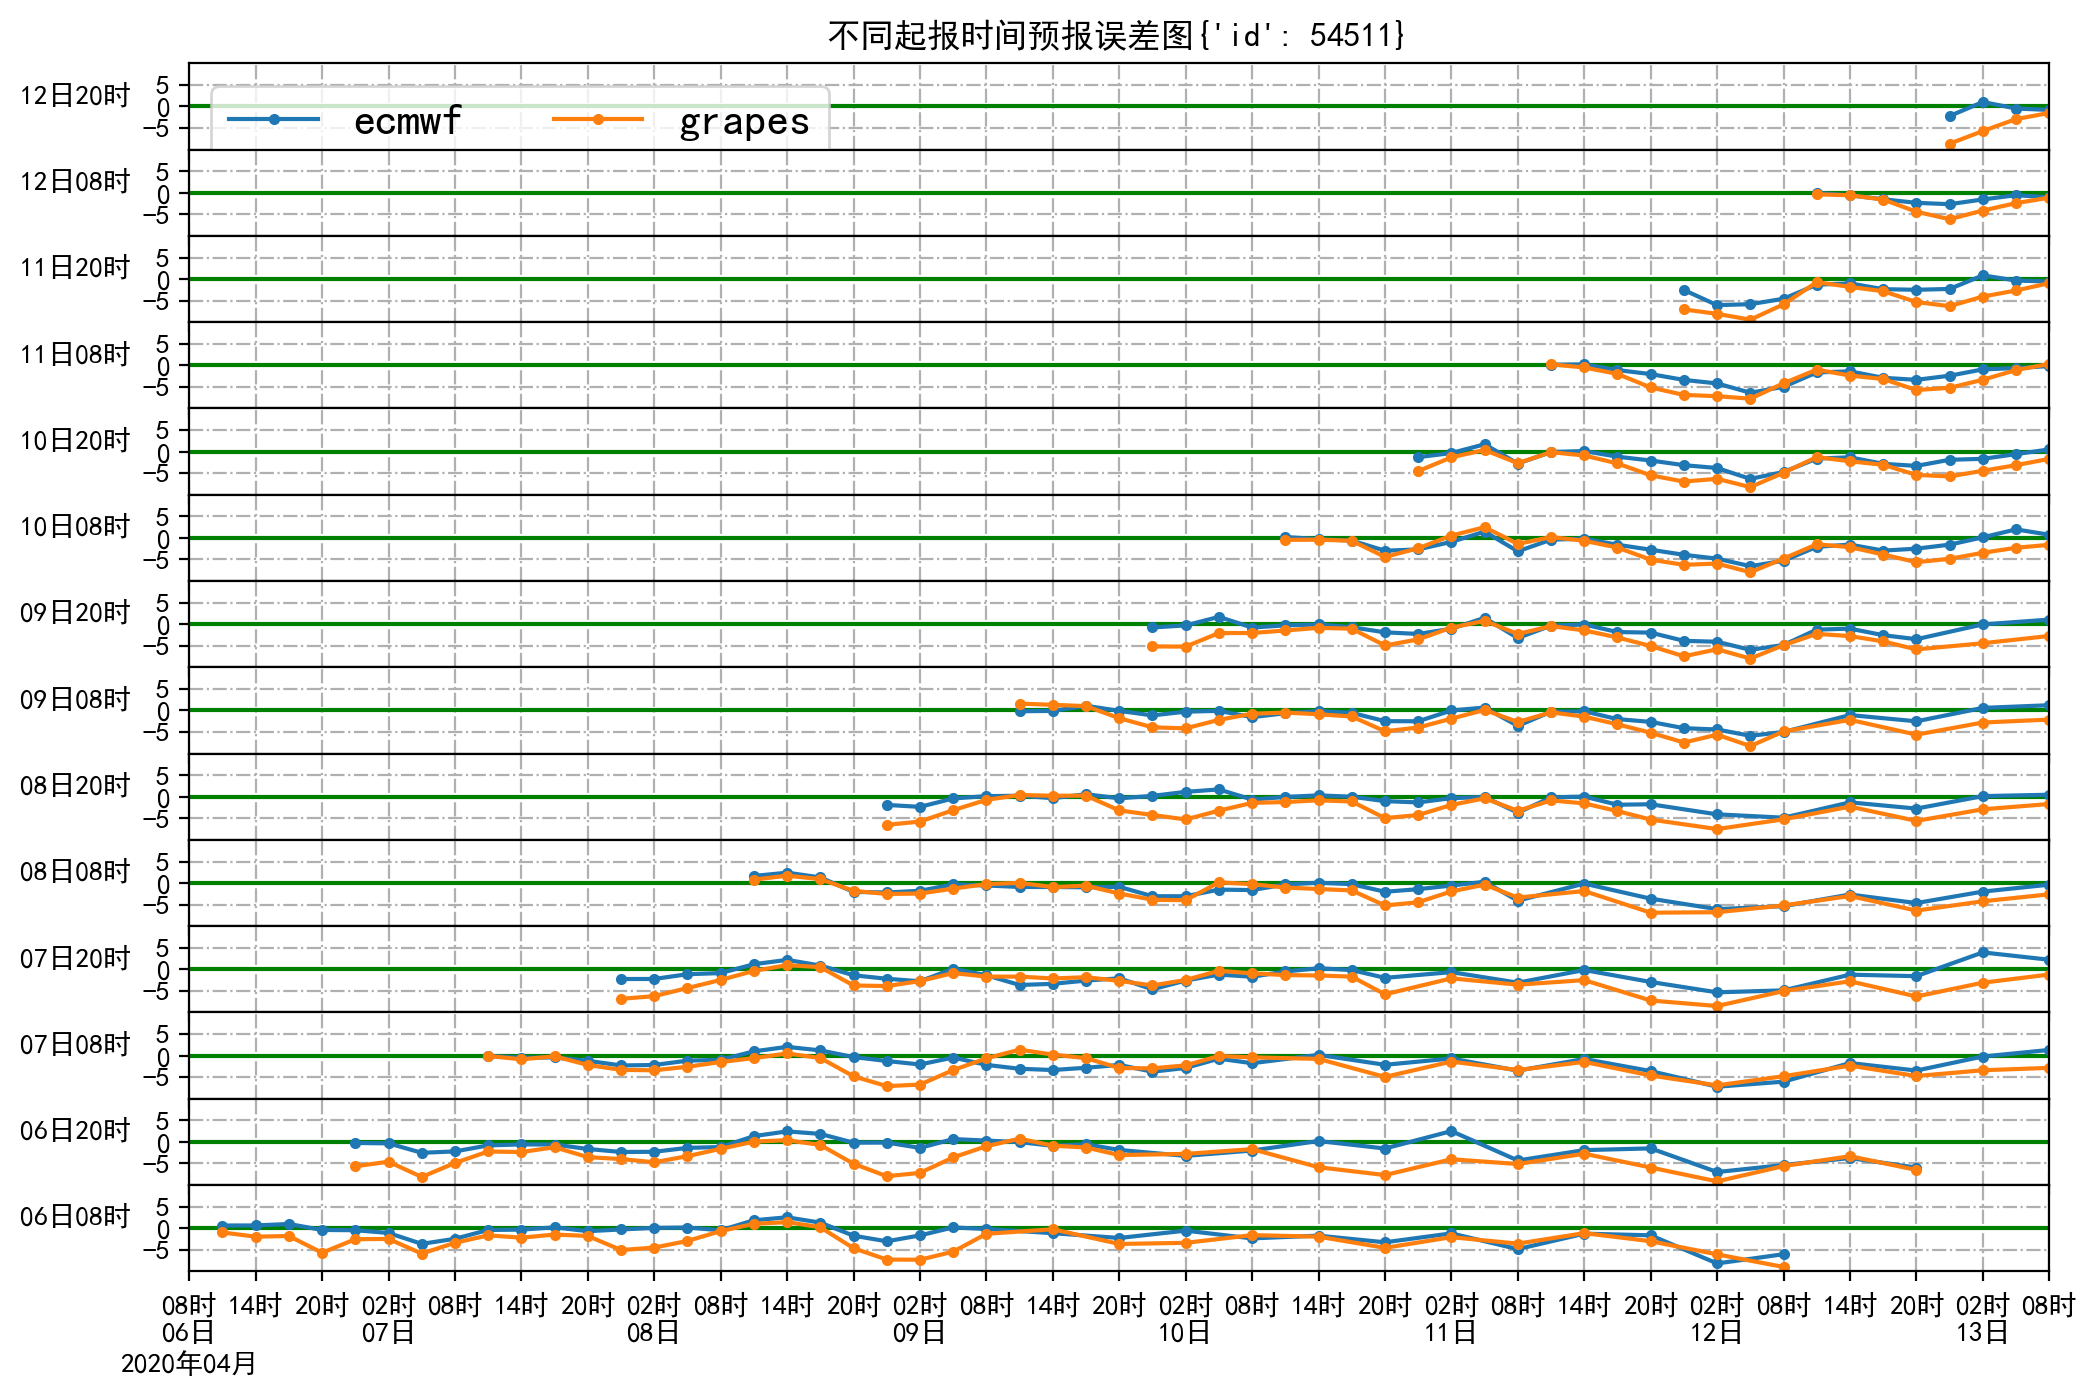

In [4]:
mpd.time_list_line_error(t2m_all) #通过直接绘制不同模式不同时效的预报的误差，可以更加直接展示误差情况

**图形样式说明：**   
1、误差图中横坐标为观测的时间   
2、纵向包含多个子图，每个子图代表一个起报时刻的结果，起报时间位于坐标轴左侧，子图纵坐标为要素值的大小  
3、误差仅显示有观测数据的部分。  
4、图片标题中会自动标记站号，如果数据中存在多个站点，则每个站分别输出一张图  

# 多时效对比图（填色） 
time_list_mesh(sta_ob_and_fos0,s = None,save_dir = None,save_path = None,
                   clev = None,cmap = None,plot_error = True,cmap_error= None,show = False,dpi = 200,title = "预报准确性和稳定性对比图")


|参数|说明|  
|:--|:--|  
|**sta_ob_and_fos**|实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的t2m_all|             
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**save_dir**| 图片输出文件夹，文件的路径将据此自动生成|  
|**save_path**| 图片输出文件路径（仅适合只输出一张图片结果的情况）|  
|**clev**| 预报和观测对比图部分的填色等级|  
|**cmap**| 预报和观测对比图部分的要素值填色方案|  
|**plot_error**| 要否显示预报和观测误差图部分|  
|**cmap_error**| 预报和观测误差图部分的要素值填色方案|  
|**show**| 是否在屏幕显示图片，如果save_path 和save_dir 为都None时，程序内部会自动将show设置True|  
|**dpi**| 绘图所采用dpi参数,效果同matplotlib中dpi参数|  
|**title**|指定图片标题|  
|<font face="黑体" color=blue size=3>return</font>|无返回值|  
  
**调用示例：**

图片已保存至H:\test_data\output\mpd\program/ecmwf_54511.png


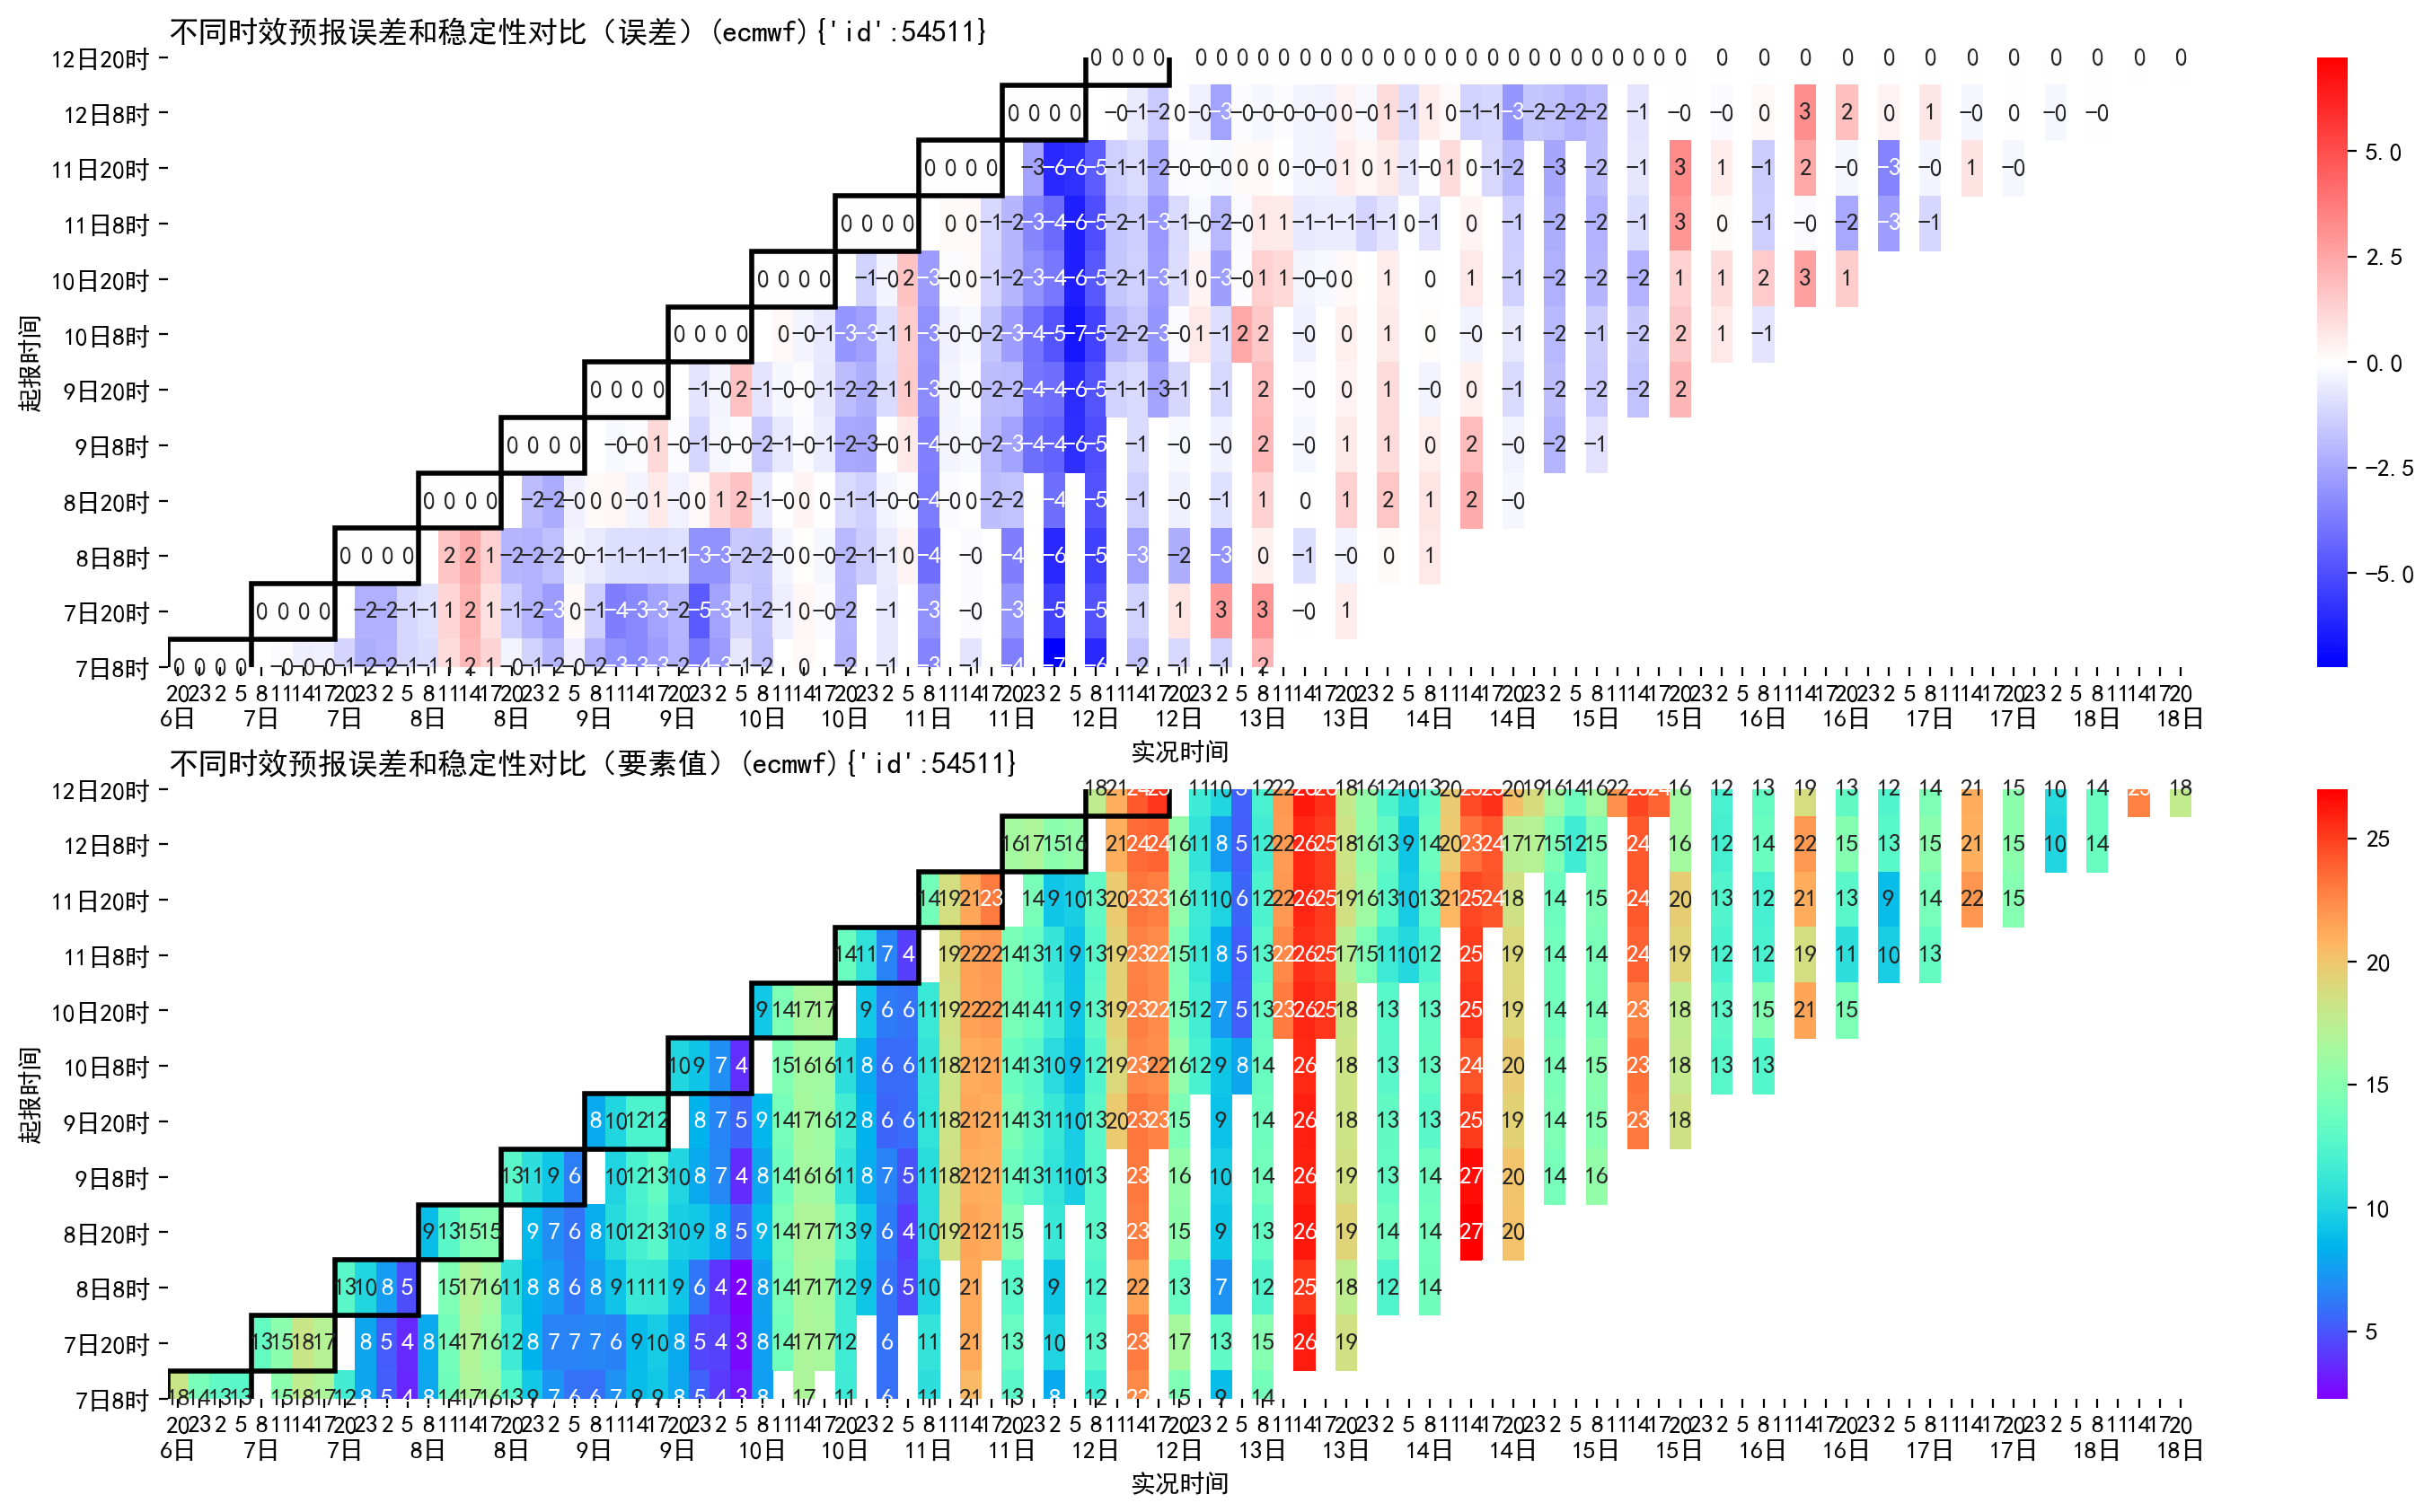

图片已保存至H:\test_data\output\mpd\program/grapes_54511.png


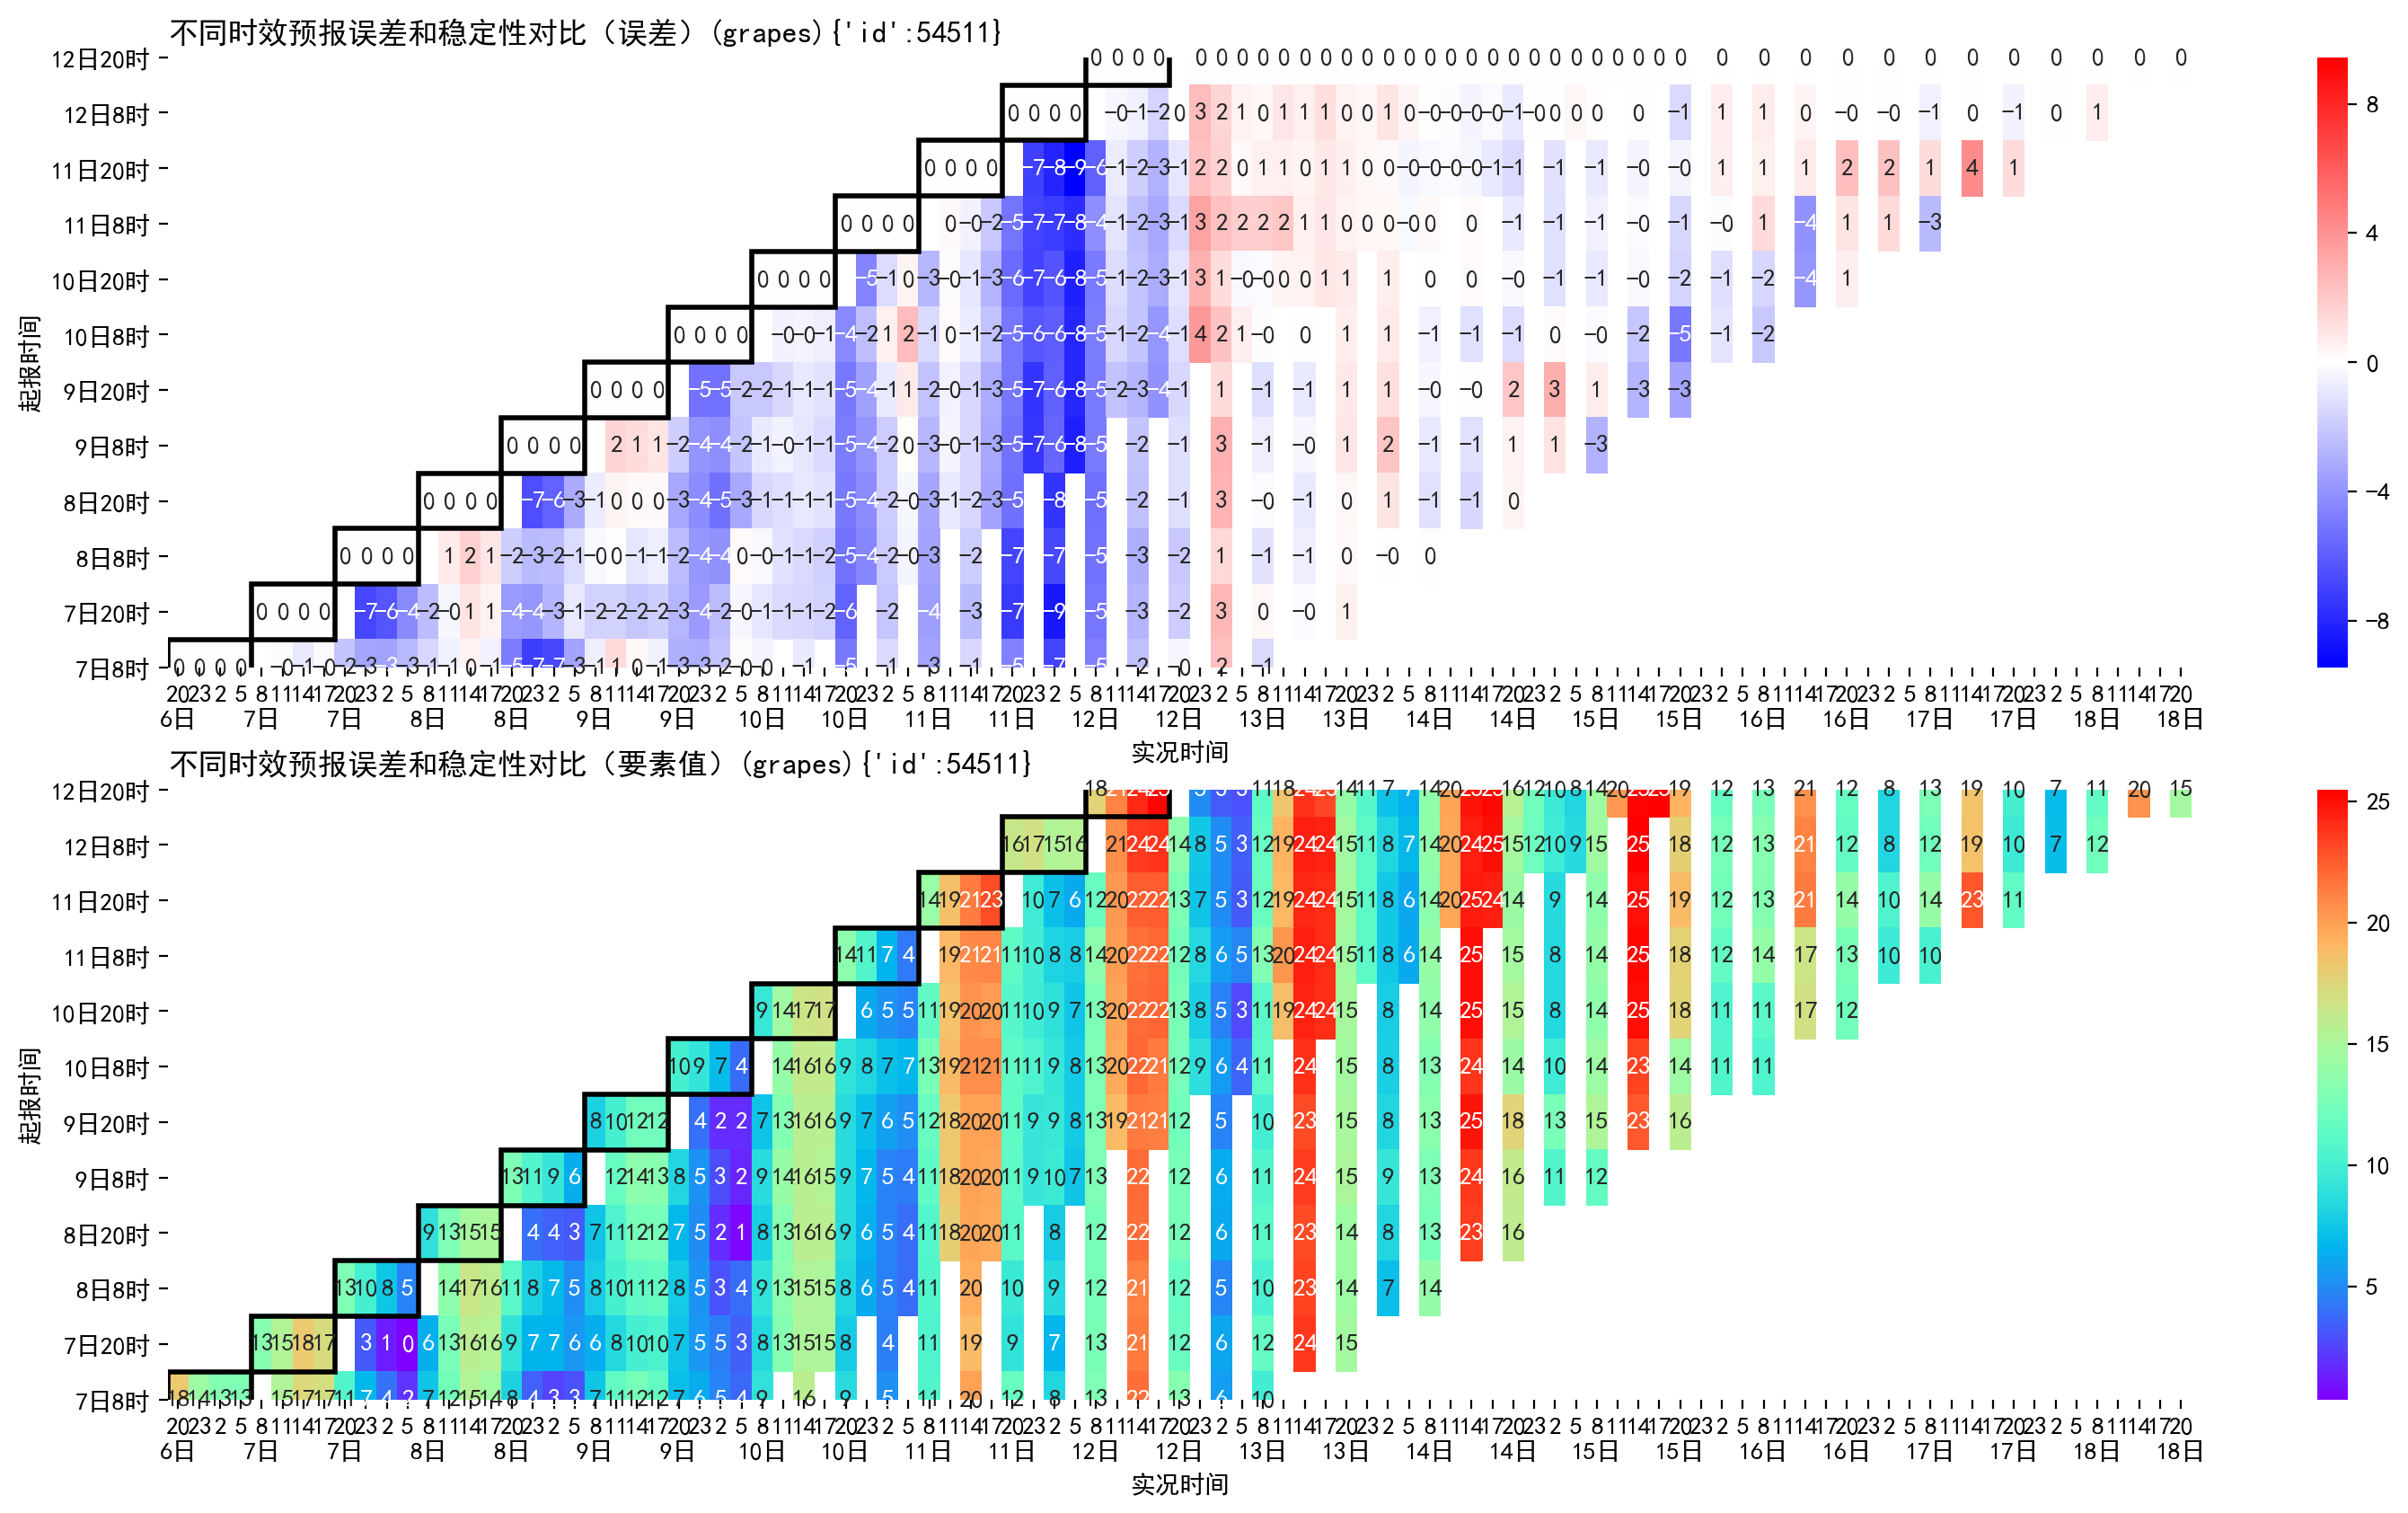

In [5]:
mpd.time_list_mesh(t2m_all,save_dir = r"H:\test_data\output\mpd\program",show = True) 
#填色图的形式相对于线条图的优点：
#1、可以便于同时展示要素对比图和误差图
#2、误差图的误差分布更显眼，更便于发现问题
#缺点是：不能在一张图中展示多模式结果，例如下面的效果中，两个模式的结果被制作成两张图分别输出

**图形样式说明：**   
1、横坐标为观测的时间   
2、纵轴为起报时间  
3、图形左侧为有观测的时段，右侧为无观测的时段
4、图形下半部分为要素原始值，上半部分为误差值（plot_error参数设为False的时候不显示）  
5、在图形左上侧黑框中的值是观测数据，其它为预报数据，其中黑色方框右侧第一数值是预报的零场值，如果数据中没有包含就以空白方式显示。    
6、在误差图中，所显示的误差并非都是同观测相比，而是与同一列的最顶端的值相比，因此在有观测的部分，是预报-观测，是将前期的预报-最新的预报。

**示例结果解读：**在上图中，相同横坐标的一列，代表观测时间相同的多个时效的预报，如果一列中都是偏高或偏低，就提示我们可能存在与天气形势有关的误差，也可能是bug导致的错误。在无观测的时段如果一段时间都是偏低，如上图中EC的偏差在15日凌晨时段所示，则提示我们模式在最新时刻有大的调整。而上图中grapes的对15日凌晨的预报则是在早期有调整，但最新时效调整不大。

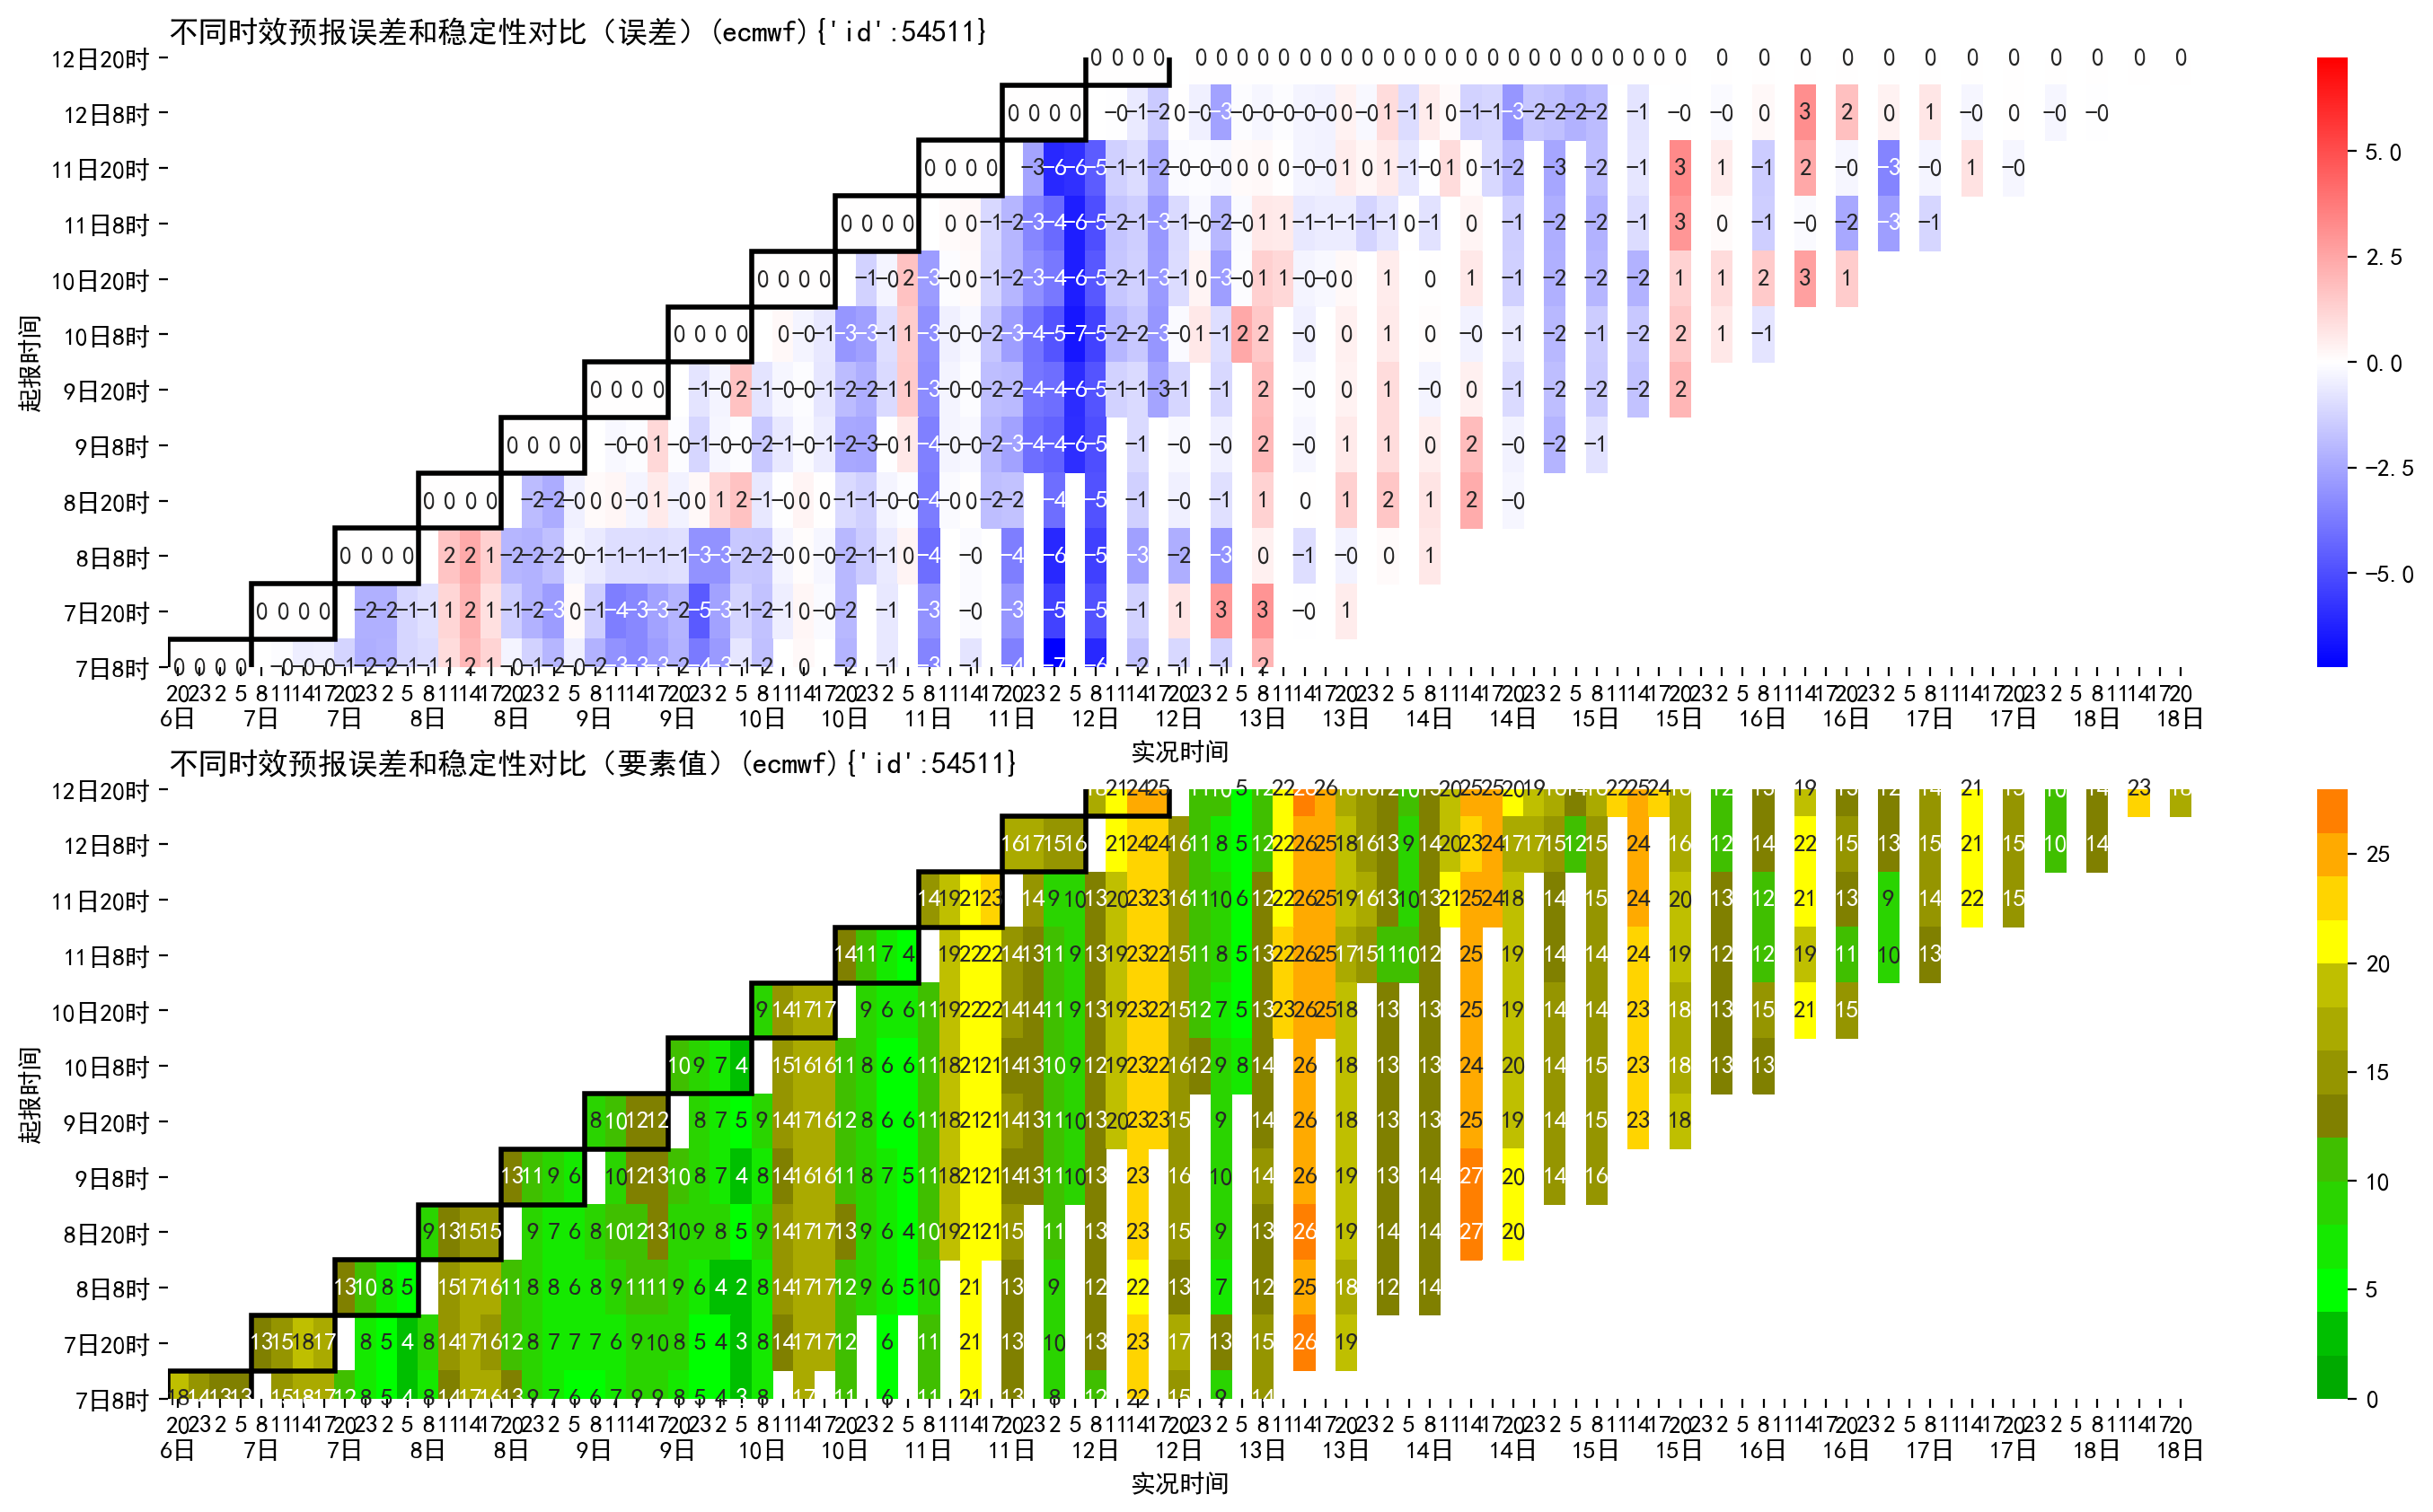

In [6]:
mpd.time_list_mesh_temp(t2m_all,s = {"member":["ob","ecmwf"]})

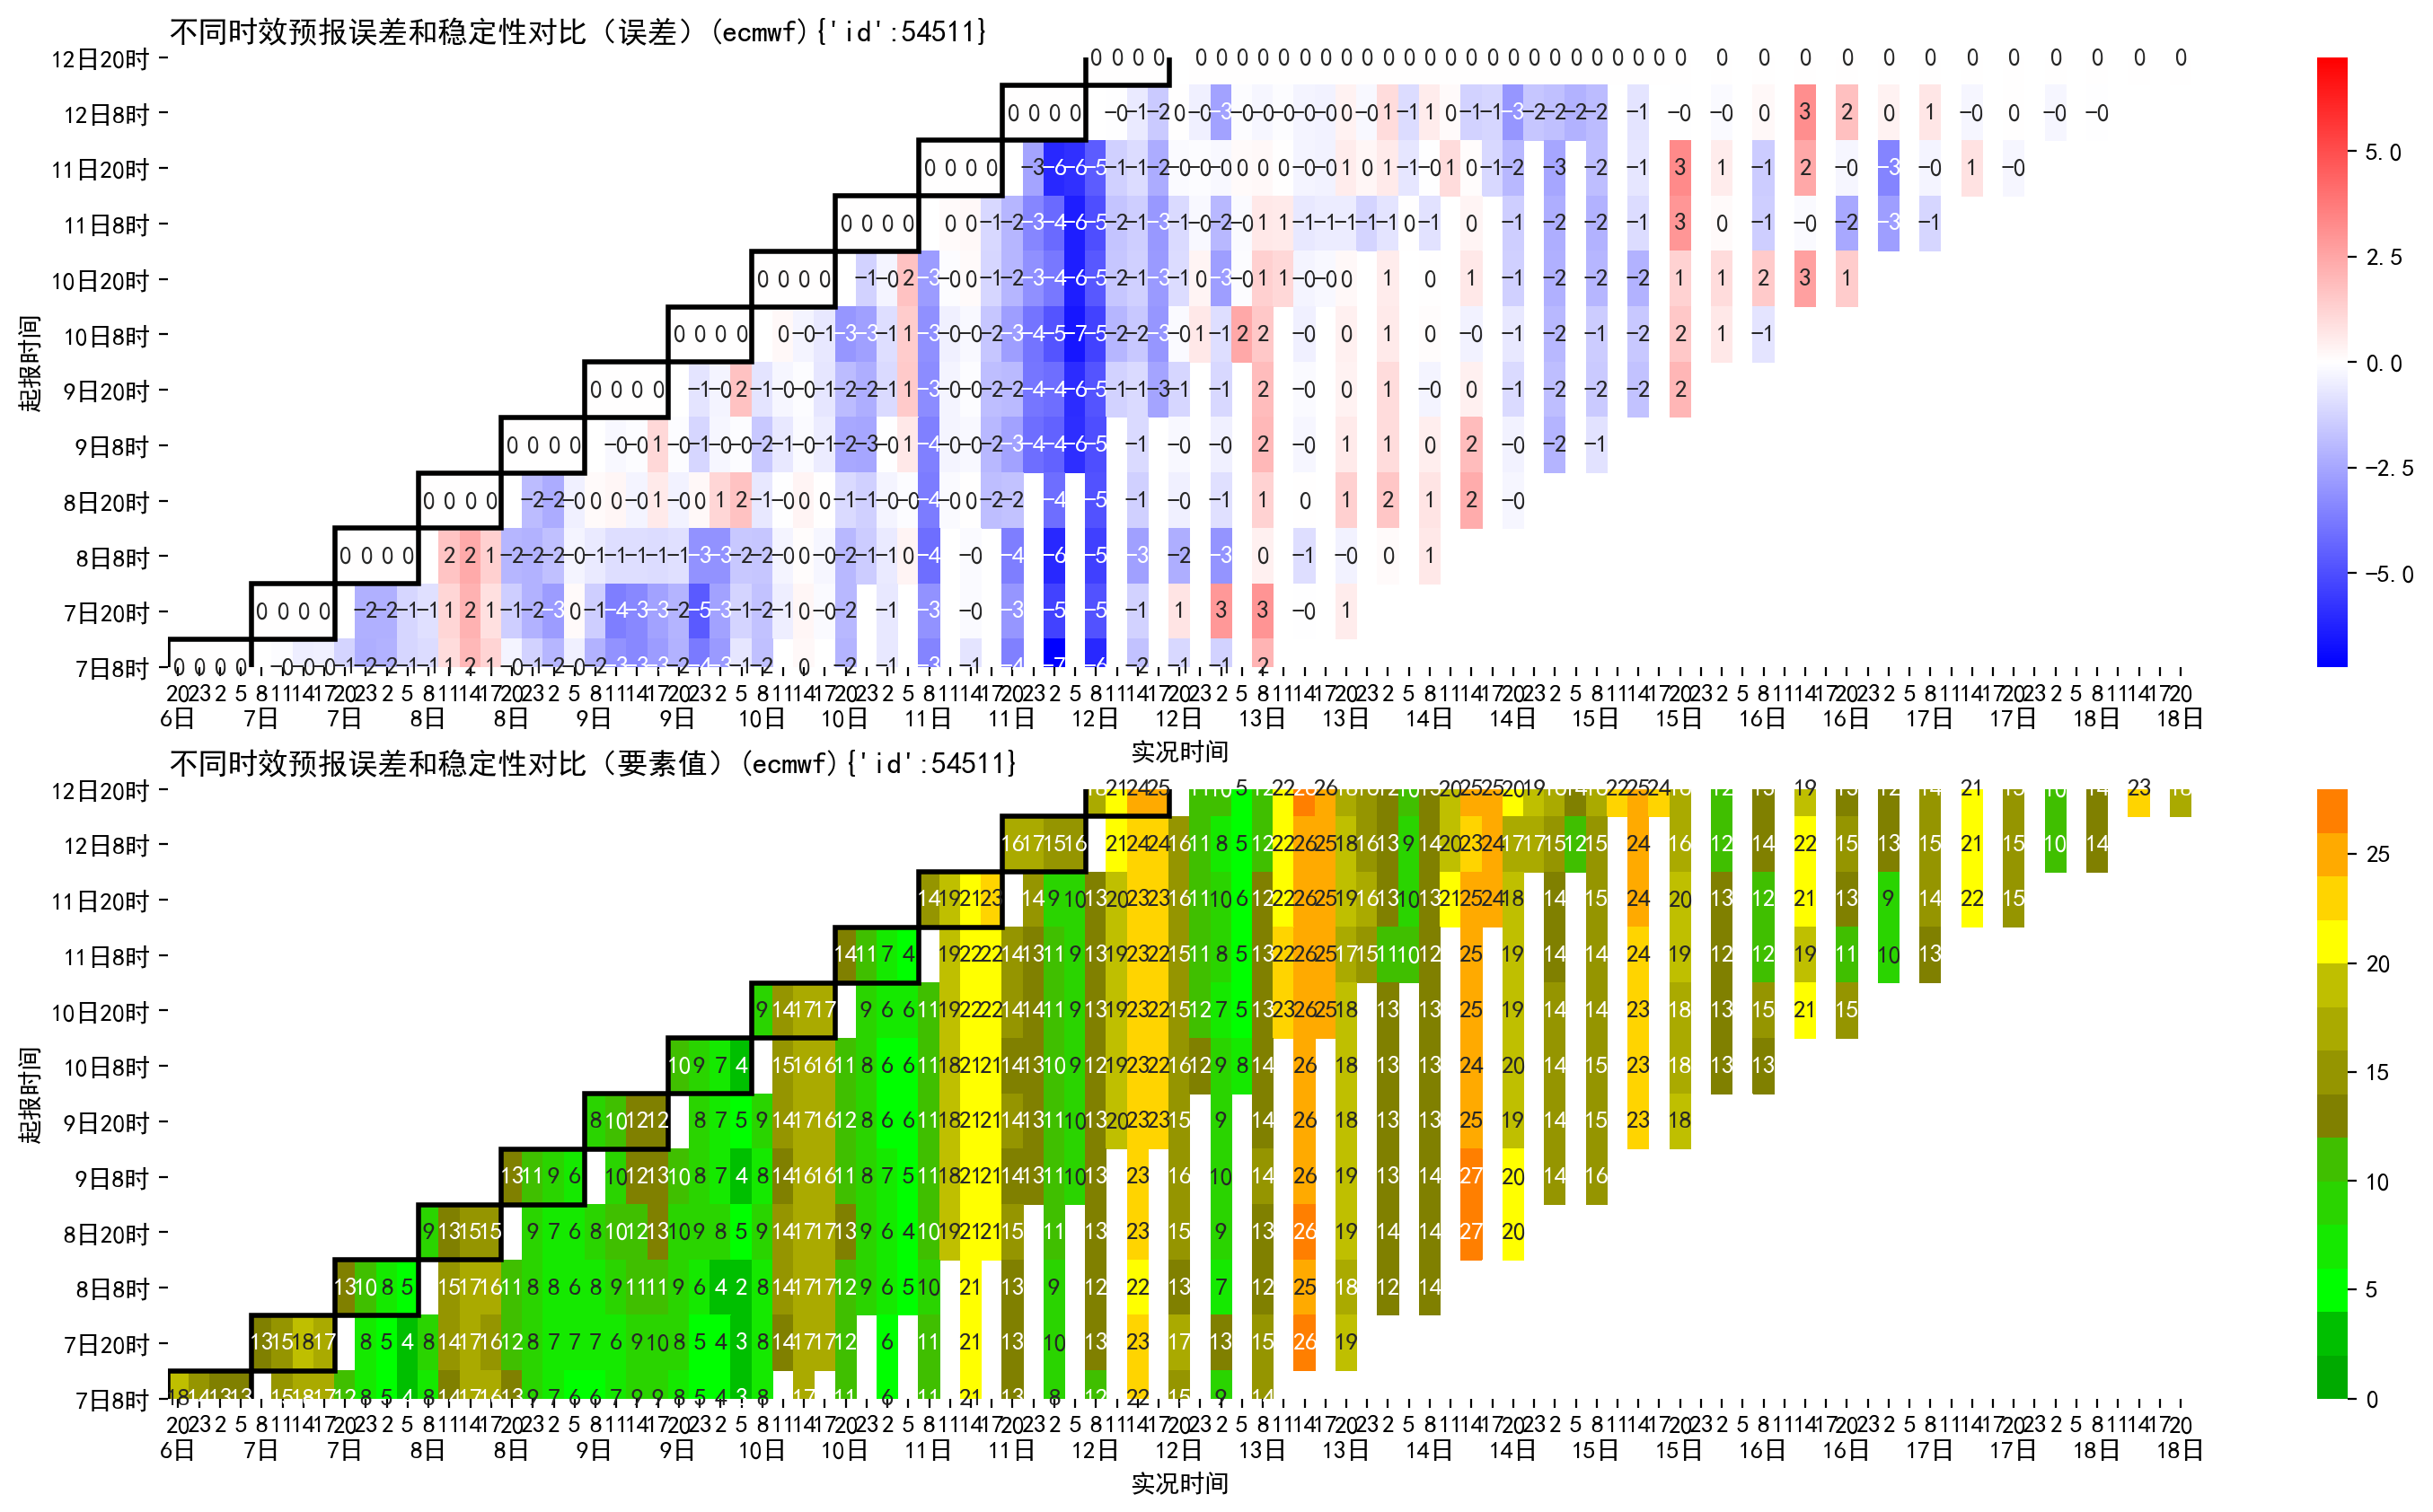

In [7]:
mpd.time_list_mesh_temp(t2m_all,s = {"member":["ob","ecmwf"]})

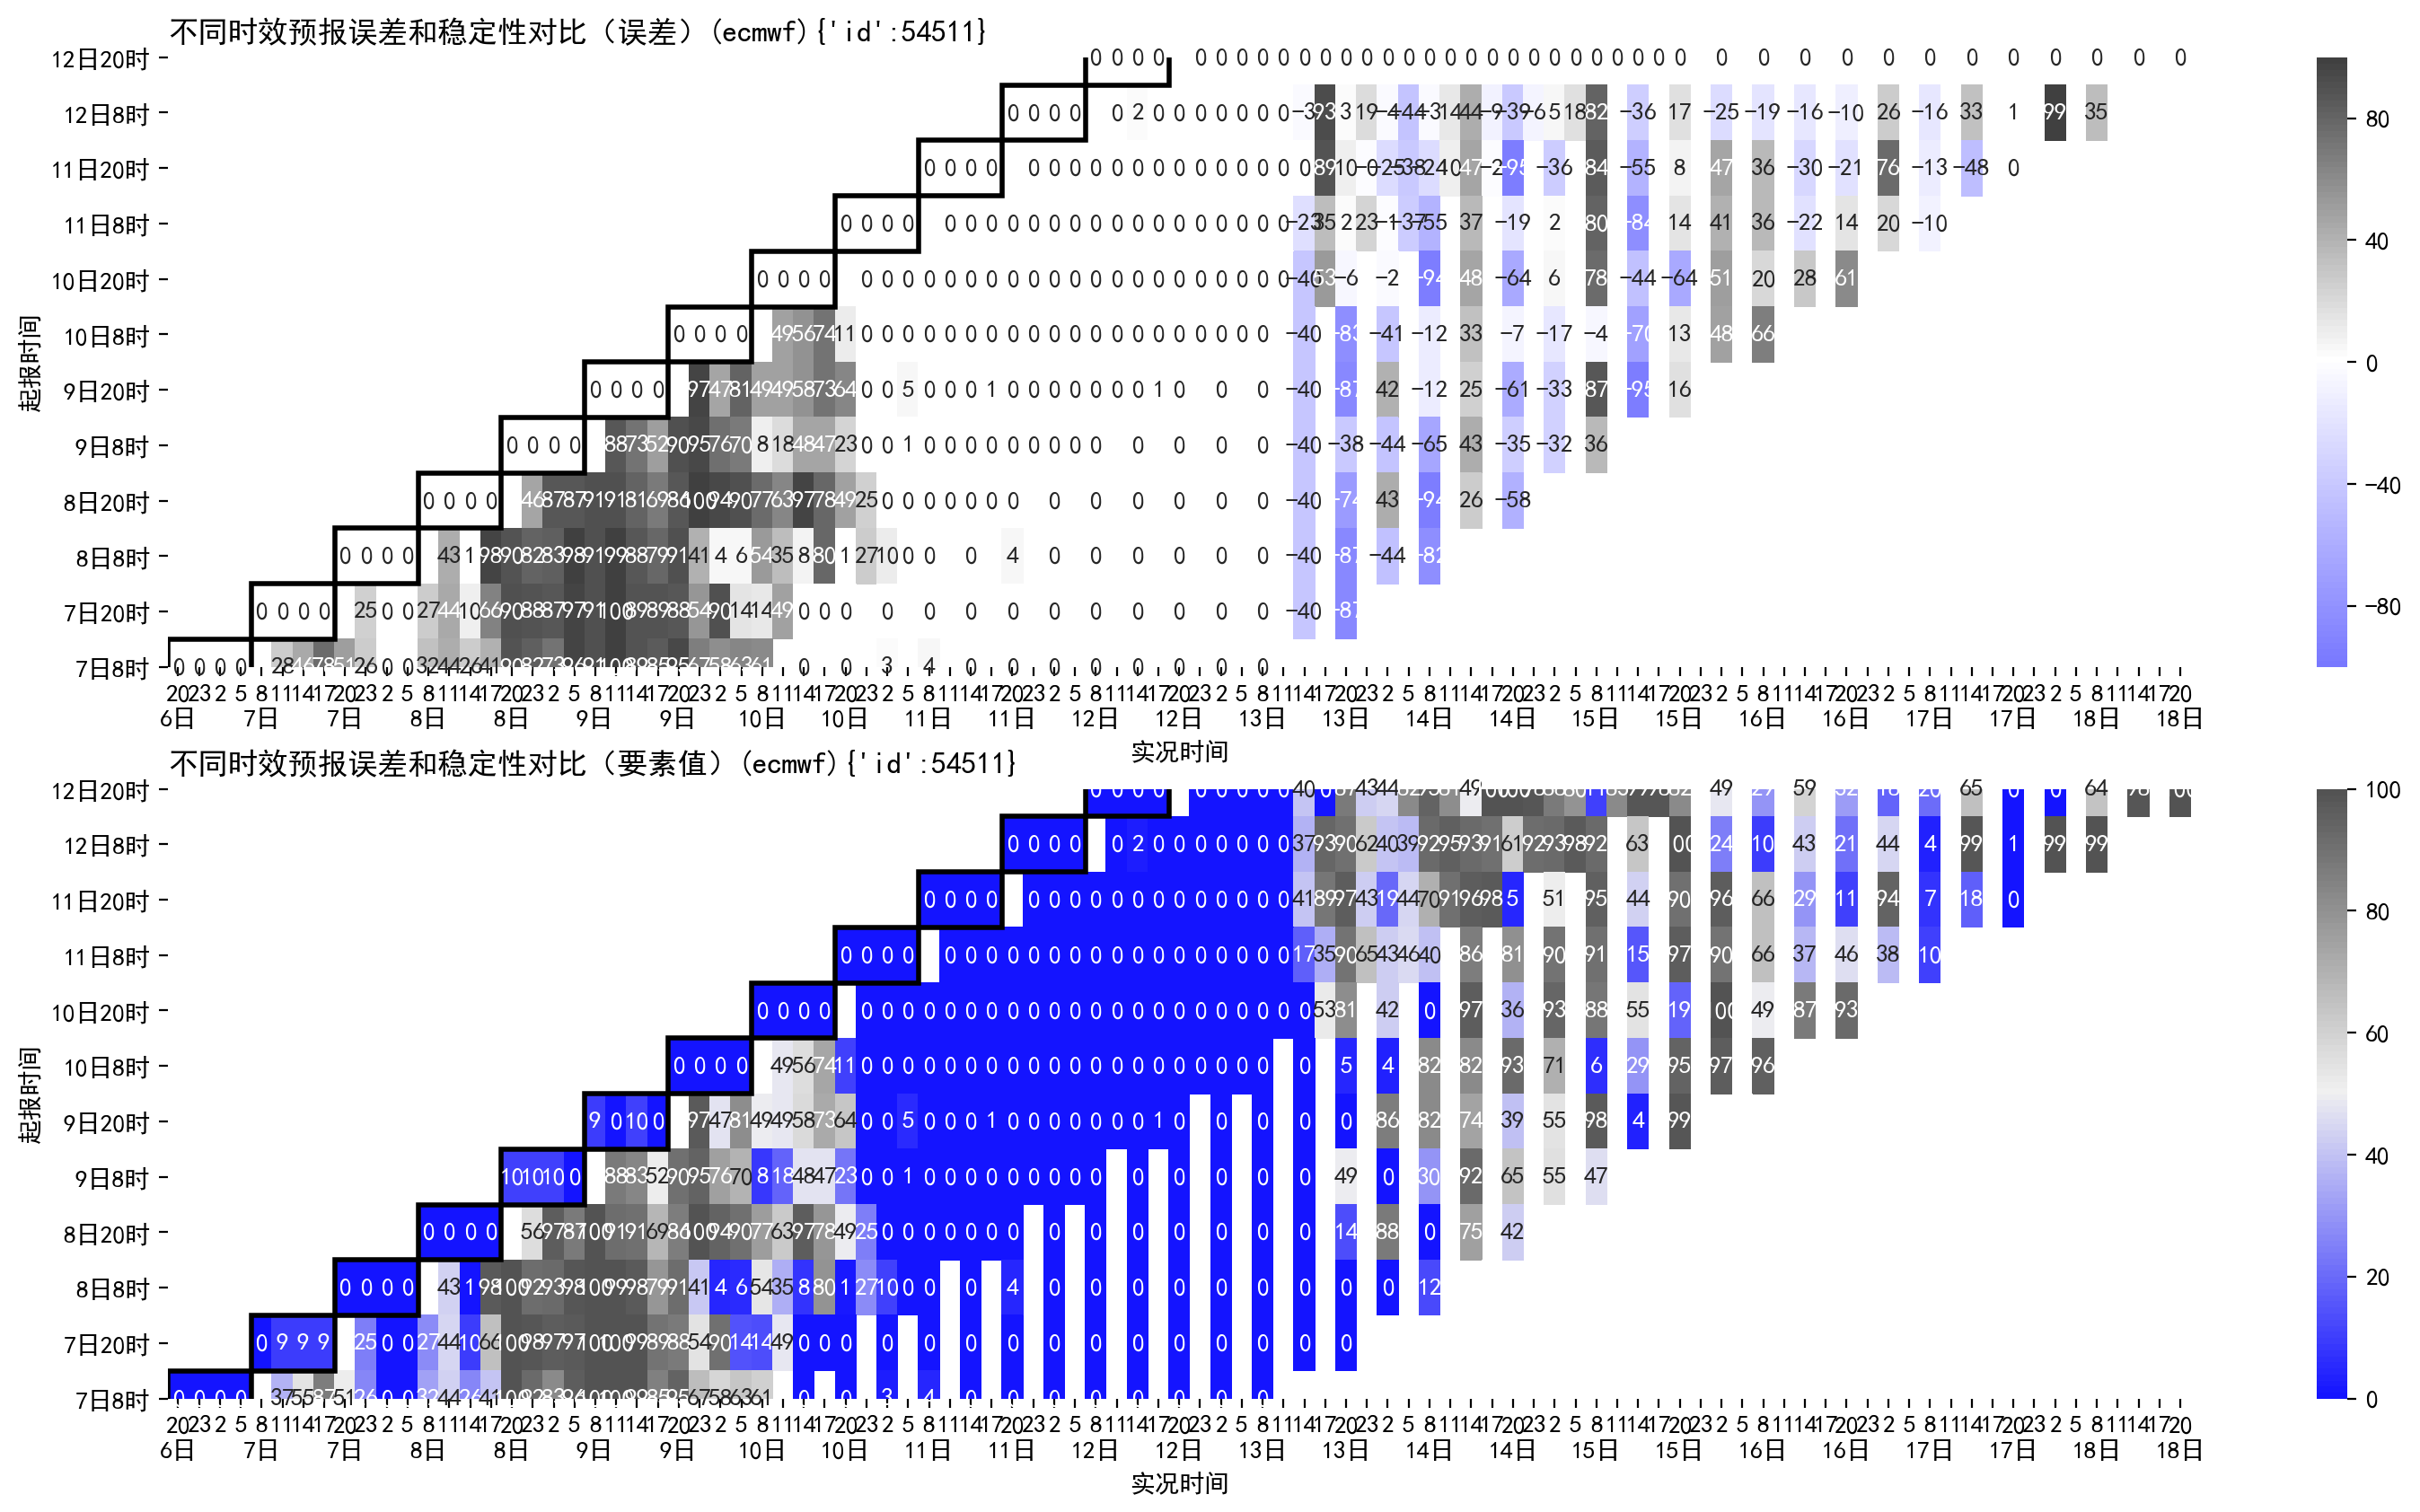

In [8]:
ob_tcdc = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ob_tcdc.h5","df")  #读取云量观测
ec_tcdc = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ec_tcdc.h5","df")  #读取云量预报
tcdc_all = meb.combine_on_obTime_id(ob_tcdc,[ec_tcdc])  #合并预报观测数据，need_match_ob为缺省参数False
mpd.time_list_mesh_tcdc(tcdc_all) #绘制云量单站检验图，采用蓝色代表少云，灰色代表多云

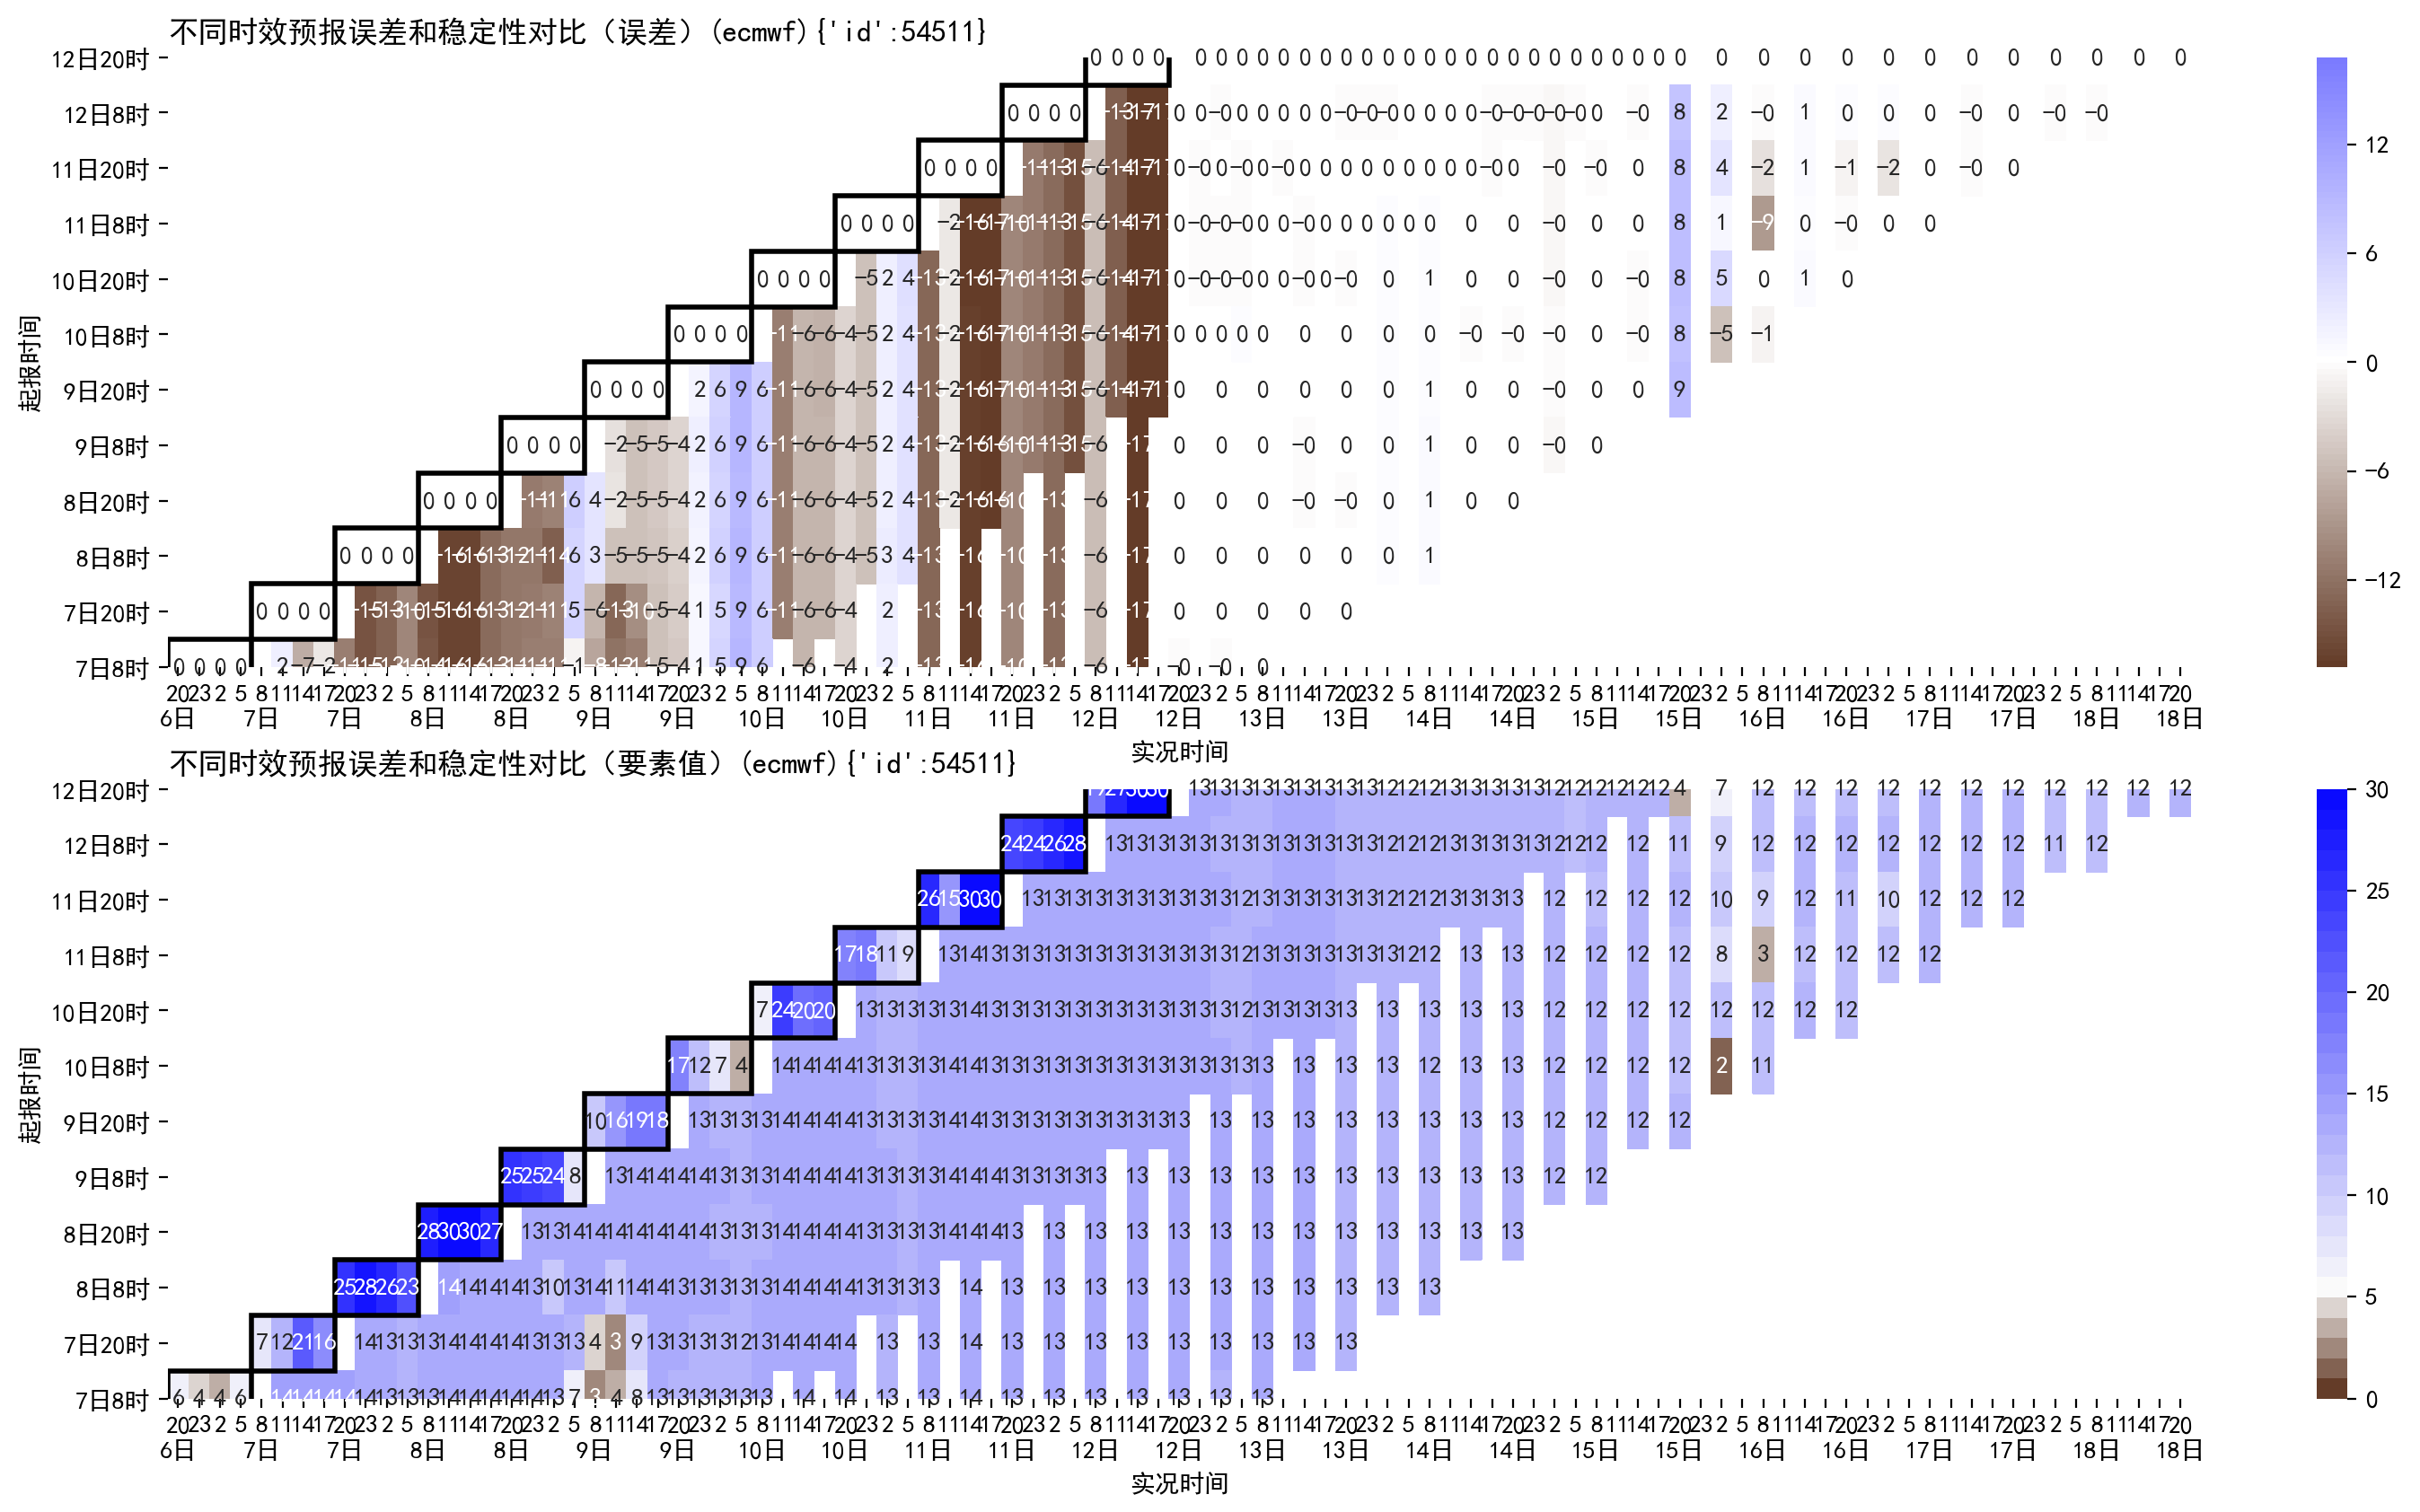

In [9]:
ob_vis = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ob_vis.h5","df")  #读取能见度观测
ec_vis = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ec_vis.h5","df")  #读能见度预报
vis_all = meb.combine_on_obTime_id(ob_vis,[ec_vis])  #合并预报观测数据，need_match_ob为缺省参数False
mpd.time_list_mesh_vis(vis_all) #绘制云量单站检验图，采用蓝色代表能见度高，棕色代表能见度低

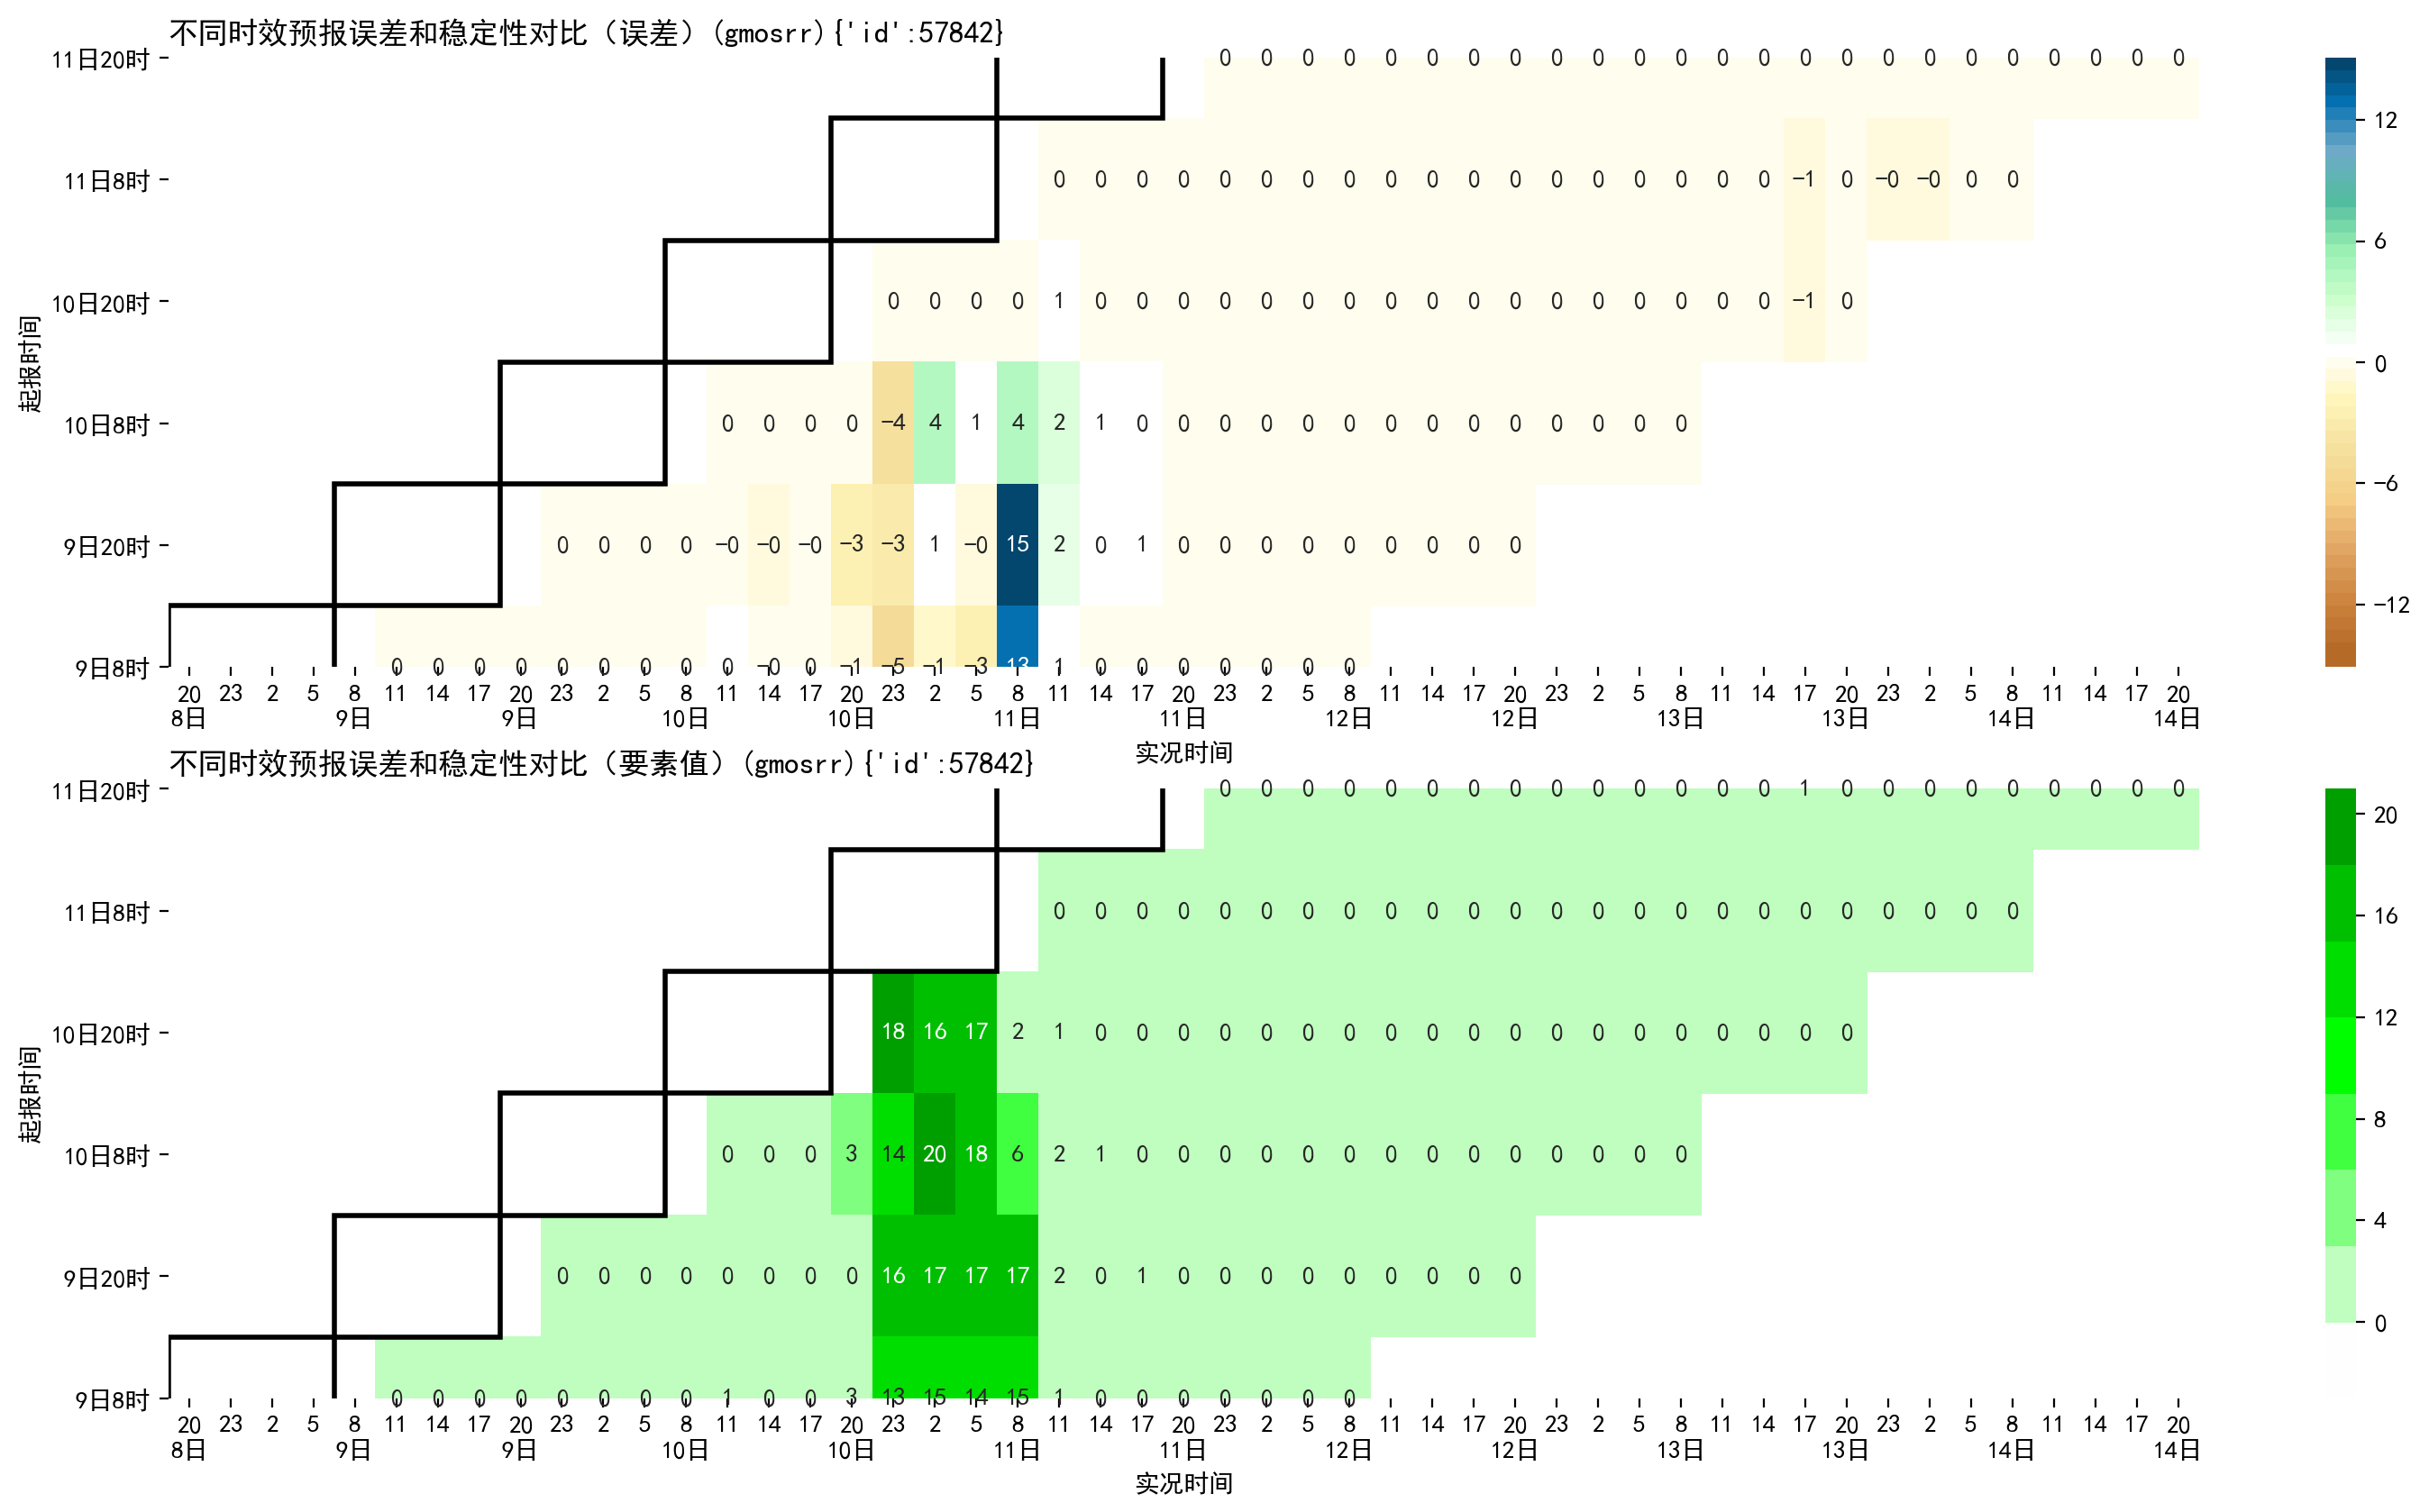

In [10]:
ob_rain01 = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ob_rain01.h5","df") #读取读取温度观测
ec_rain03 = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ec_rian03.h5","df") #读取读取温度观测
ob_rain03 = meb.accumulate_time(ob_rain01,3)  #将降水观测有逐小时累加成逐3小时
rh_all =meb.combine_on_obTime_id(ob_rain03,[ec_rain03]) #合并预报观测数据，need_match_ob为缺省参数False
mpd.time_list_mesh_rain03h(rh_all,s ={"time_range":["2020040820","2020041120"]}) #选取部分时段绘制对比图

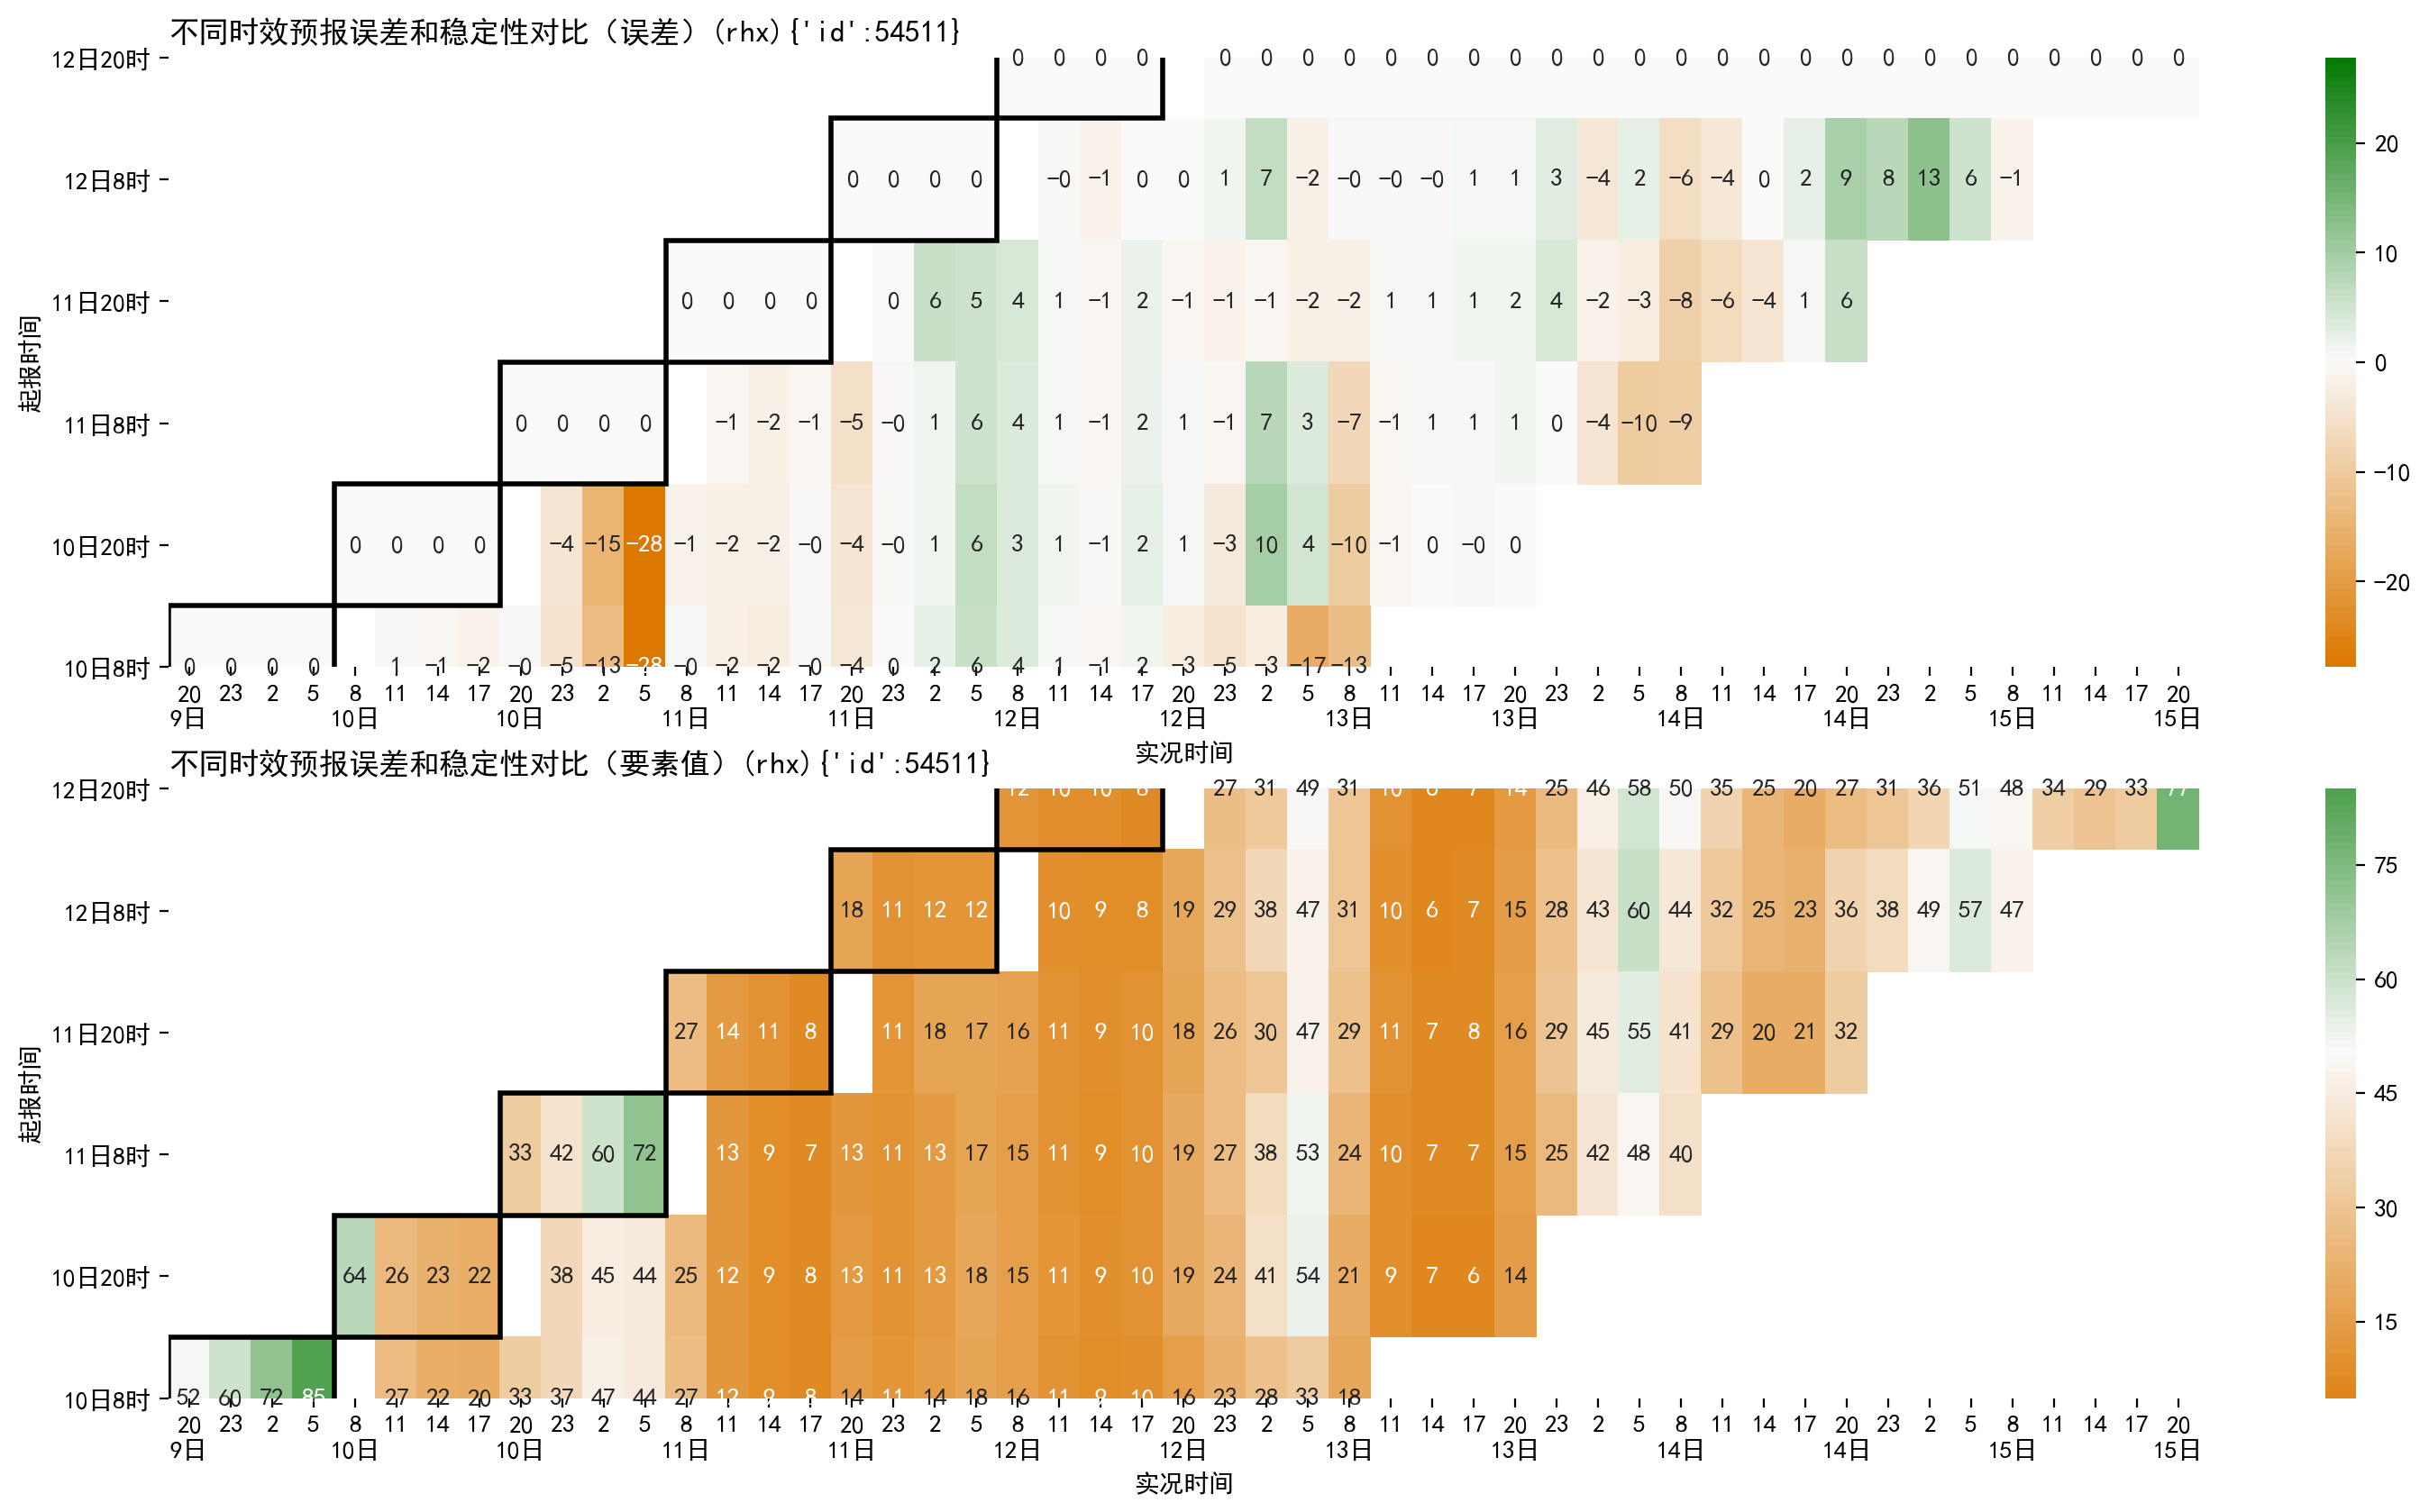

In [11]:
ob_t2m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ob_t2m.h5","df") #读取读取温度观测
ec_t2m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ec_t2m.h5","df") #读取读取温度观测

ob_dtp2m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ob_dtp2m.h5","df")  #读取读取露点观测
ec_dtp2m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ec_dtp2m.h5","df")  #读露点预报

rh_ob =  meb.t_dtp_to_rh(ob_t2m,ob_dtp2m) #计算观测的相对湿度
rh_ec =  meb.t_dtp_to_rh(ec_t2m,ec_dtp2m) #计算预报的相对湿度

rh_all =meb.combine_on_obTime_id(rh_ob,[rh_ec]) #合并预报观测数据，need_match_ob为缺省参数False

mpd.time_list_mesh_rh(rh_all,s = {"dtime_range":[0,72]}) #绘制云量单站检验图，采用蓝色代表能见度高，棕色代表能见度低

# 单站风的多时效对比图
time_list_mesh_wind(sta_ob_and_fos0,s = None,save_dir = None,save_path = None,plot_error = True,show = False,dpi = 200,title = "预报准确性和稳定性对比图")


|参数|说明|  
|:--|:--|  
|**sta_ob_and_fos**|实况和预报合并对齐后的数据，形式为站点数据格式下述例子中的wind_all|             
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**save_dir**| 图片输出文件夹，文件的路径将据此自动生成|  
|**save_path**| 图片输出文件路径（仅适合只输出一张图片结果的情况）|  
|**plot_error**| 要否显示预报和观测误差图部分|  
|**show**| 是否在屏幕显示图片，如果save_path 和save_dir 为都None时，程序内部会自动将show设置True|  
|**dpi**| 绘图所采用dpi参数,效果同matplotlib中dpi参数|  
|**title**|指定图片标题|  
|<font face="黑体" color=blue size=3>return</font>|无返回值|  
  
**调用示例：**

In [12]:
ob_wind10m = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ob_wind10m.h5","df")  #读取读取露点观测
ob_uv = meb.speed_angle_to_wind(ob_wind10m) #观测数据中原始数据为风速风向，则可以通过该函数转换为u，v
ec_uv = pd.read_hdf(r"H:\test_data\input\mpd\time_compair\ec_wind10m.h5","df")  #读露点预报
wind_all =meb.combine_on_obTime_id(ob_uv,[ec_uv]) #合并预报观测数据，need_match_ob为缺省参数False
print(wind_all)  #绘制风场检验的数据以u、v、...、u、v的形式排列，前两列默认为是观测，之后是预报  

     level                time  dtime     id     lon   lat              u  \
0      0.0 2020-04-06 08:00:00      3  54511  116.47  39.8       1.394383   
1      0.0 2020-04-06 20:00:00      3  54511  116.47  39.8      -0.154433   
2      0.0 2020-04-07 08:00:00      3  54511  116.47  39.8      -0.172479   
3      0.0 2020-04-07 20:00:00      3  54511  116.47  39.8      -1.628287   
4      0.0 2020-04-08 08:00:00      3  54511  116.47  39.8      -1.191180   
..     ...                 ...    ...    ...     ...   ...            ...   
499    0.0 2020-04-12 20:00:00    120  54511  116.47  39.8  999999.000000   
500    0.0 2020-04-12 20:00:00    126  54511  116.47  39.8  999999.000000   
501    0.0 2020-04-12 20:00:00    132  54511  116.47  39.8  999999.000000   
502    0.0 2020-04-12 20:00:00    138  54511  116.47  39.8  999999.000000   
503    0.0 2020-04-12 20:00:00    144  54511  116.47  39.8  999999.000000   

                 v   u_ecmwf   v_ecmwf  
0         0.125288  0.239926 -0.01

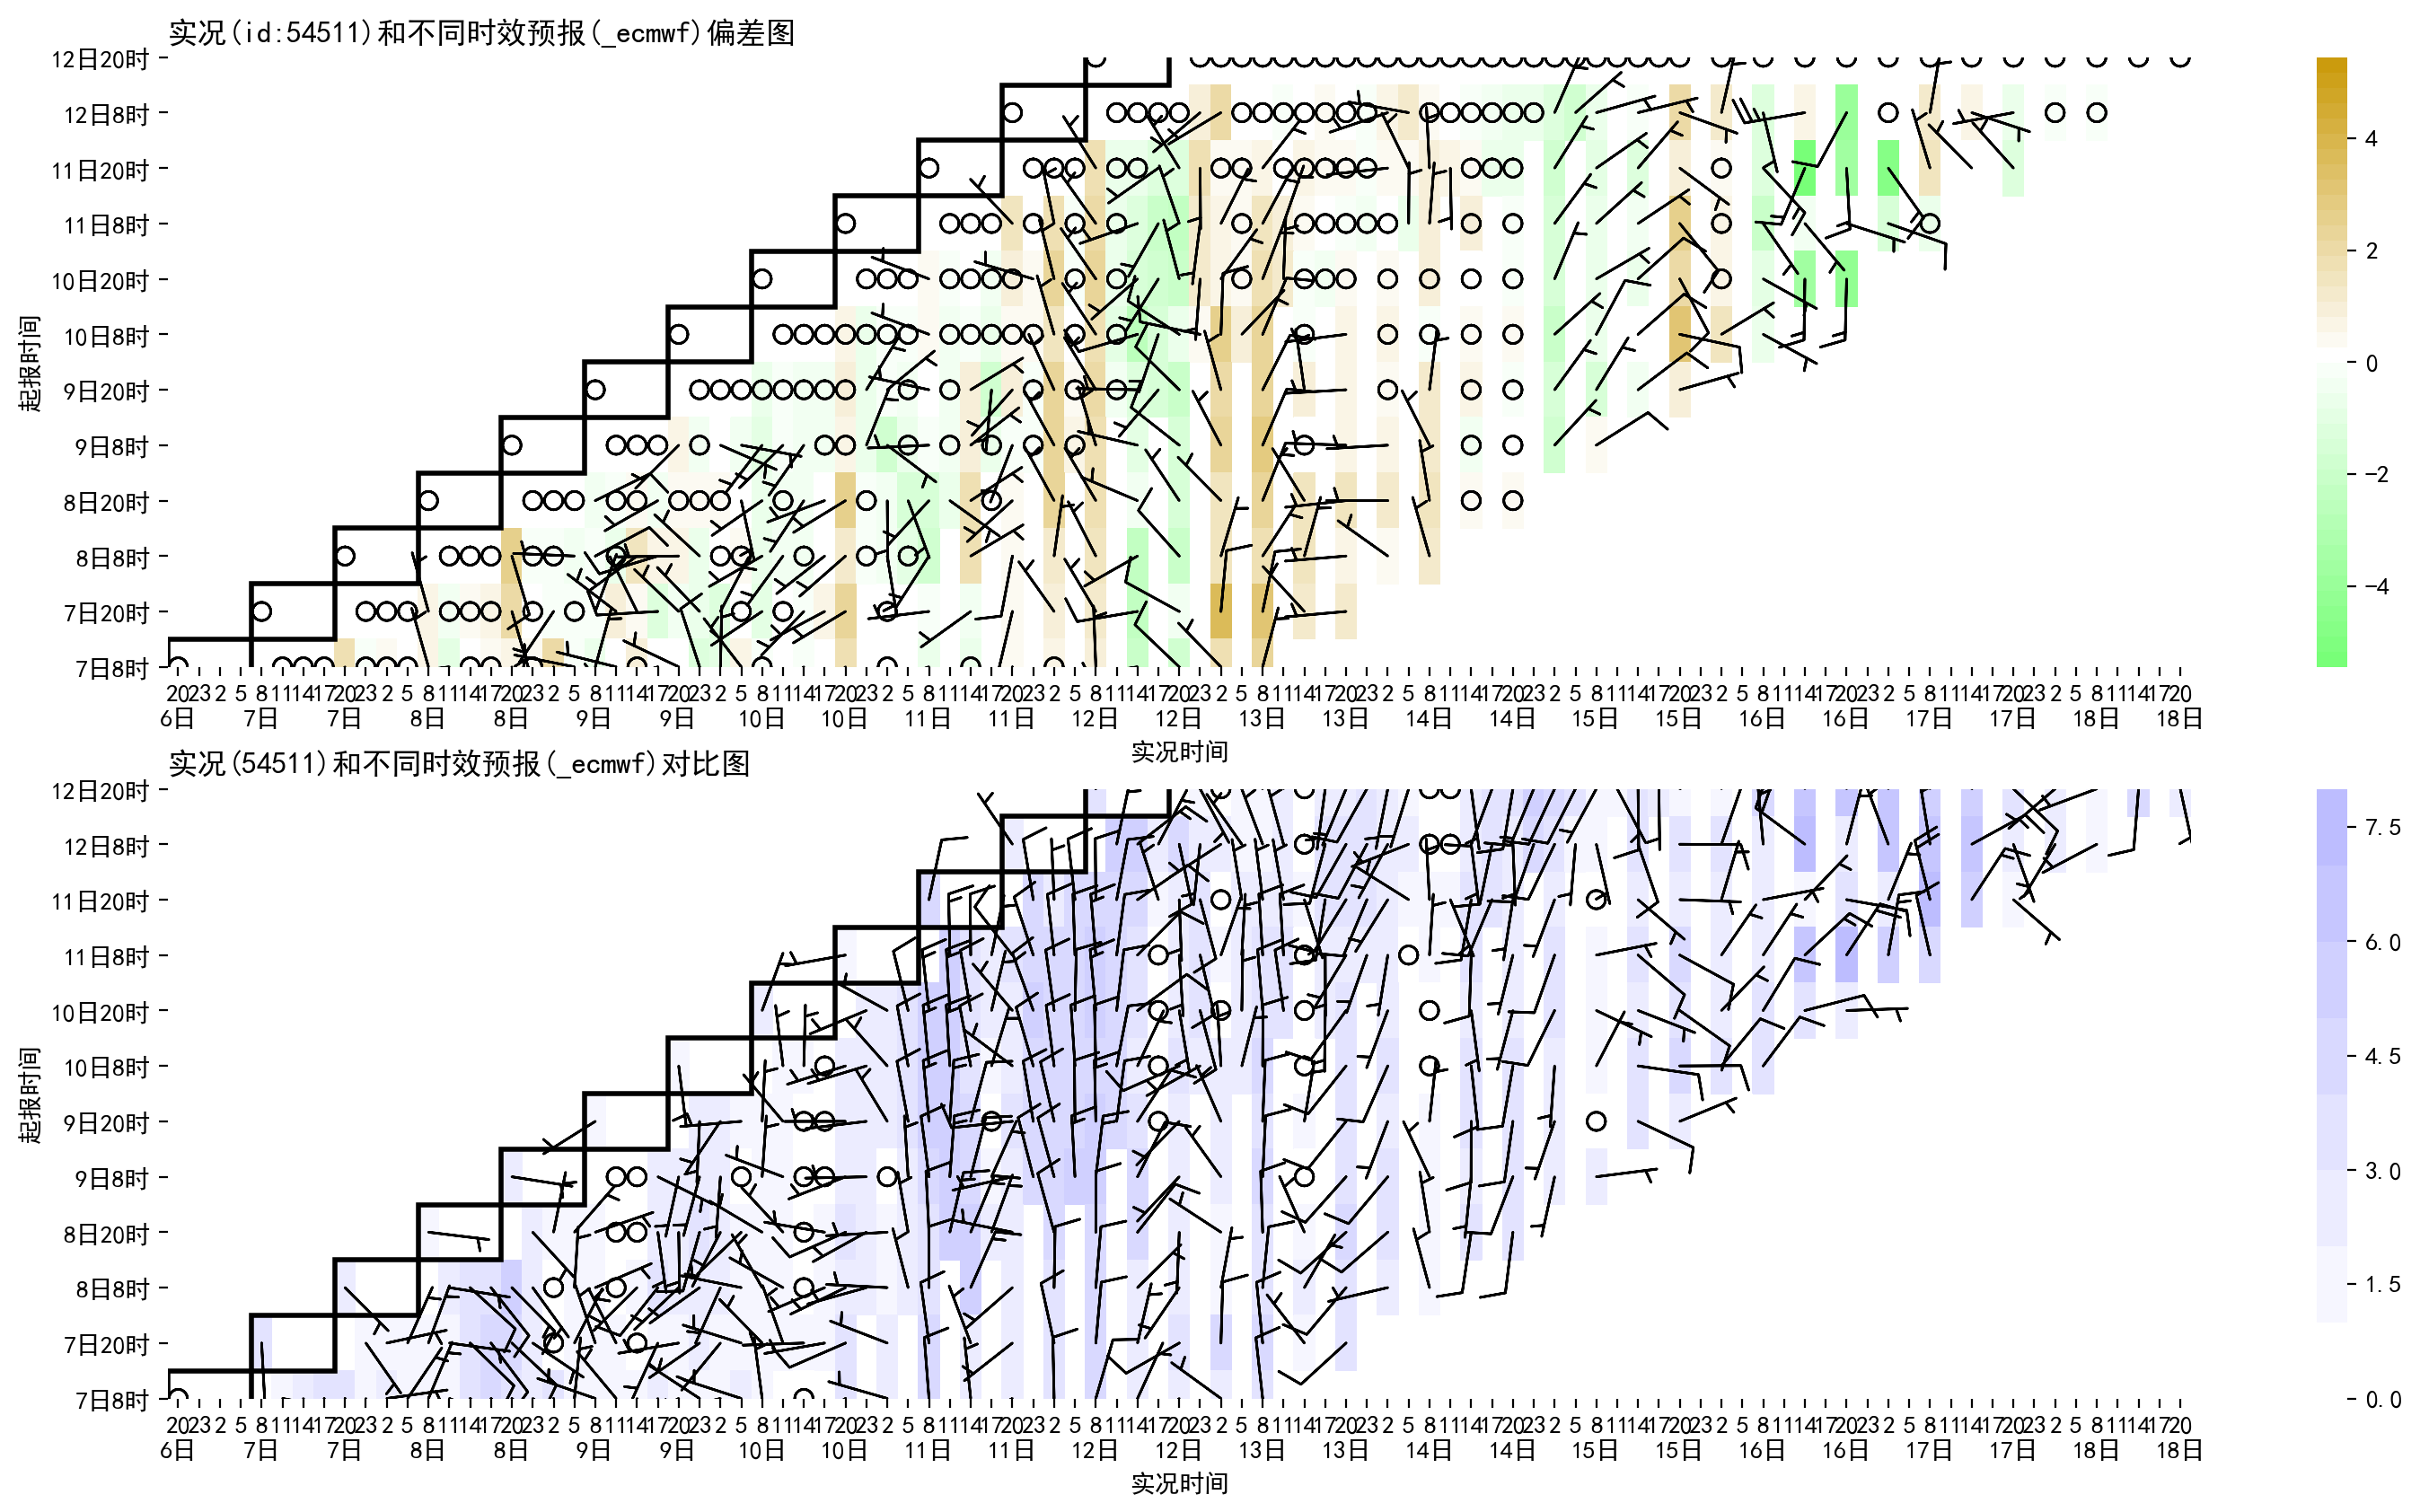

In [13]:
mpd.time_list_mesh_wind(wind_all) #绘制云量单站检验图，采用蓝色代表能见度高，棕色代表能见度低

**图形样式说明：**   
1、横坐标为观测的时间   
2、纵轴为起报时间  
3、图形左侧为有观测的时段，右侧为无观测的时段  
4、图形下半部分为要素原始值，风向杆代表风向风速，此外填色也代表风速。   
5、上半部分为误差值（plot_error参数设为False的时候不显示），  风向杆代表两个风矢量之间的矢量差。  
6、在误差图中，所显示的误差并非都是同观测相比，而是与同一列的最顶端的值相比，因此在有观测的部分，是预报-观测，是将前期的预报-最新的预报。
7、所有方格中，如果数据缺失了就以空白显示，如果风速约等于0或者误差矢量的大小约等于0，则以圆圈形式显示  
8、在图形左上侧黑框中的值是观测数据，其它为预报数据，其中黑色方框右侧第一数值是预报的零场值，如果数据中没有包含就以空白方式显示。    
